In [2]:
##Importing necessary liabraries
!pip install kmodes

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from scipy.stats import shapiro
import scipy.stats as stats



In [3]:
Supply= pd.read_csv('Data.csv')
Supply.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

In [4]:
pd.options.display.max_columns = None

In [5]:
Supply.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [6]:
Supply.tail()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
24995                  4             5390         Rented               19   
24996                  4             4490  Company Owned               57   
24997                  2             5403         Rented               31   
24998                  2            10562         Rented               25   
24999                  4             5664  Company Owned               21   

       flood_impacted  flood_proof  electric_supply  dist_from_hub  \
24995               0            0                1            142   
24996               0            0                1            130   
24997               1            0                1            147   
24998               0            0                1             60   
24999               0            1                1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

      approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
24995                            A                 2              30   
24996                            B                 4              18   
24997                           B+                 5              25   
24998                            A                 6              30   
24999                           B+                 2              11   

       product_wg_ton  
24995           32093  
24996           12114  
24997           27080  
24998           25093  
24999            5058

In [7]:
Supply.shape

(25000, 24)

In [8]:
Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [9]:
Supply.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

## Univariate Analysis

### Categorical Variables

In [10]:
Supply.describe(include='all')["Ware_house_ID"]

count         25000
unique        25000
top       WH_100000
freq              1
mean            NaN
std             NaN
min             NaN
25%             NaN
50%             NaN
75%             NaN
max             NaN
Name: Ware_house_ID, dtype: object

In [11]:
Supply.Ware_house_ID.value_counts()

Ware_house_ID
WH_100000    1
WH_116650    1
WH_116672    1
WH_116671    1
WH_116670    1
            ..
WH_108331    1
WH_108330    1
WH_108329    1
WH_108328    1
WH_124999    1
Name: count, Length: 25000, dtype: int64

In [12]:
Supply.WH_Manager_ID.unique()

array(['EID_50000', 'EID_50001', 'EID_50002', ..., 'EID_74997',
       'EID_74998', 'EID_74999'], dtype=object)

In [13]:
Supply.describe(include='all')["WH_Manager_ID"]

count         25000
unique        25000
top       EID_50000
freq              1
mean            NaN
std             NaN
min             NaN
25%             NaN
50%             NaN
75%             NaN
max             NaN
Name: WH_Manager_ID, dtype: object

In [14]:
Supply.WH_Manager_ID.value_counts()

WH_Manager_ID
EID_50000    1
EID_66650    1
EID_66672    1
EID_66671    1
EID_66670    1
            ..
EID_58331    1
EID_58330    1
EID_58329    1
EID_58328    1
EID_74999    1
Name: count, Length: 25000, dtype: int64

In [15]:
Supply.Location_type.value_counts()

Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64

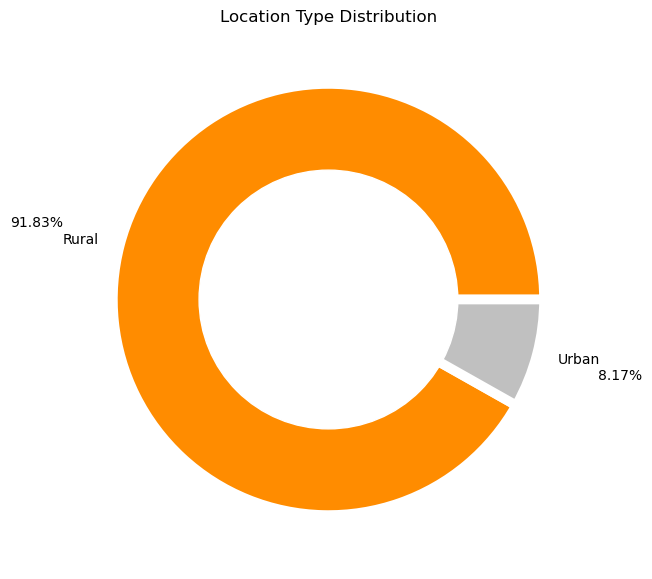

In [16]:
Rural    = Supply.Location_type.value_counts()['Rural']
Urban = Supply.Location_type.value_counts()['Urban']
names = ['Rural','Urban']
size  = [Rural, Urban]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.4,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('Location Type Distribution')
plt.show()

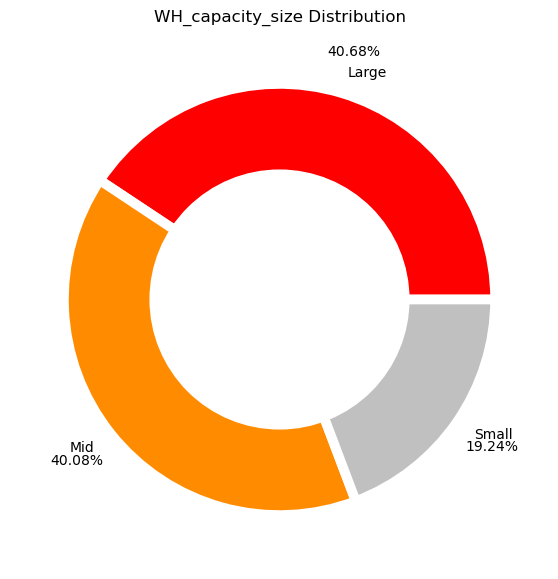

In [17]:
Large    = Supply.WH_capacity_size.value_counts()['Large']
Mid = Supply.WH_capacity_size.value_counts()['Mid']
Small = Supply.WH_capacity_size.value_counts()['Small']
names = ['Large','Mid','Small']
size  = [Large, Mid,Small]
# create a pie chart
plt.pie(size, labels=names, colors=['Red','darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.2,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('WH_capacity_size Distribution')
plt.show()

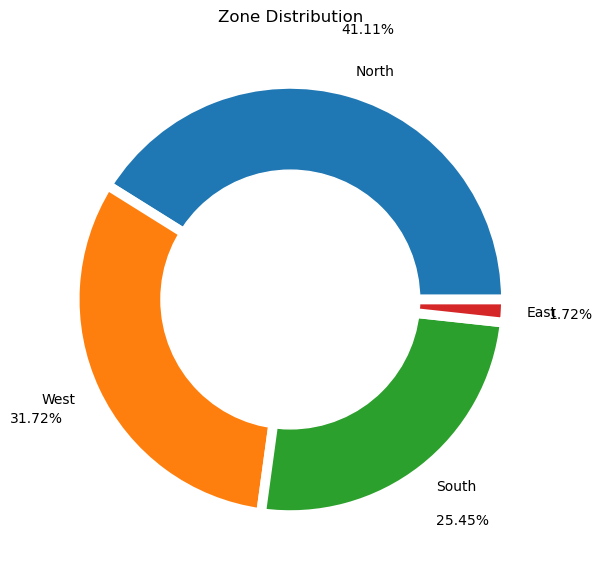

In [18]:
North    = Supply.zone.value_counts()['North']
West = Supply.zone.value_counts()['West']
South = Supply.zone.value_counts()['South']
East = Supply.zone.value_counts()['East']

names = ['North','West','South','East']
size  = [North, West,South,East]
# create a pie chart
plt.pie(size, labels=names, 
        autopct='%.2f%%', pctdistance=1.30,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('Zone Distribution')
plt.show()

In [19]:
Supply.WH_regional_zone.value_counts()

WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64

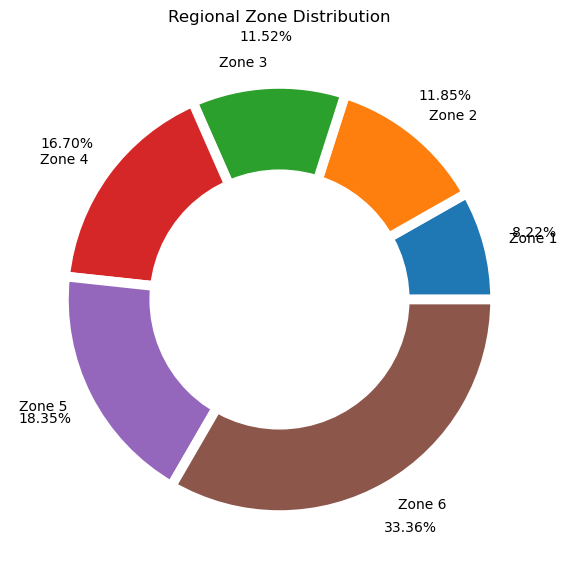

In [20]:
Zone1    = Supply.WH_regional_zone.value_counts()['Zone 1']
Zone2 = Supply.WH_regional_zone.value_counts()['Zone 2']
Zone3 = Supply.WH_regional_zone.value_counts()['Zone 3']
Zone4 = Supply.WH_regional_zone.value_counts()['Zone 4']
Zone5 = Supply.WH_regional_zone.value_counts()['Zone 5']
Zone6 = Supply.WH_regional_zone.value_counts()['Zone 6']

names = ['Zone 1','Zone 2','Zone 3','Zone 4','Zone 5','Zone 6']
size  = [Zone1, Zone2,Zone3,Zone4,Zone5,Zone6]
# create a pie chart
plt.pie(size, labels=names, 
        autopct='%.2f%%', pctdistance=1.22,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('Regional Zone Distribution')
plt.show()

In [21]:
Supply.wh_owner_type.value_counts()

wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64

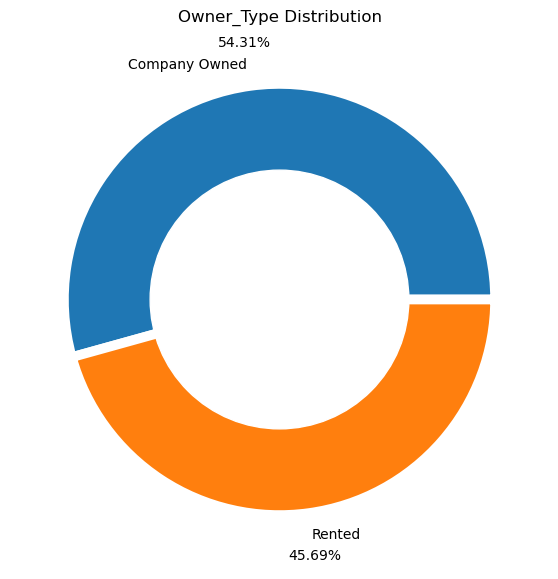

In [22]:
Company_Owned    = Supply.wh_owner_type.value_counts()['Company Owned']
Rented = Supply.wh_owner_type.value_counts()['Rented']

names = ['Company Owned','Rented']
size  = [Company_Owned, Rented]
# create a pie chart
plt.pie(size, labels=names, 
        autopct='%.2f%%', pctdistance=1.2,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('Owner_Type Distribution')
plt.show()

In [23]:
Supply.approved_wh_govt_certificate.value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

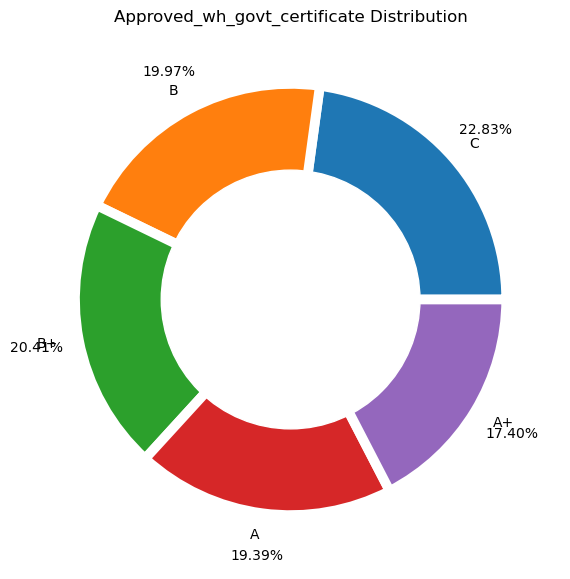

In [24]:
C    = Supply.approved_wh_govt_certificate.value_counts()['C']
B = Supply.approved_wh_govt_certificate.value_counts()['B']
BPlus = Supply.approved_wh_govt_certificate.value_counts()['B+']
A = Supply.approved_wh_govt_certificate.value_counts()['A']
APlus = Supply.approved_wh_govt_certificate.value_counts()['A+']

names = ['C','B','B+','A','A+']
size  = [C, B,BPlus,A,APlus]
# create a pie chart
plt.pie(size, labels=names, 
        autopct='%.2f%%', pctdistance=1.2,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.title('Approved_wh_govt_certificate Distribution')
plt.show()

### Numeric Variables

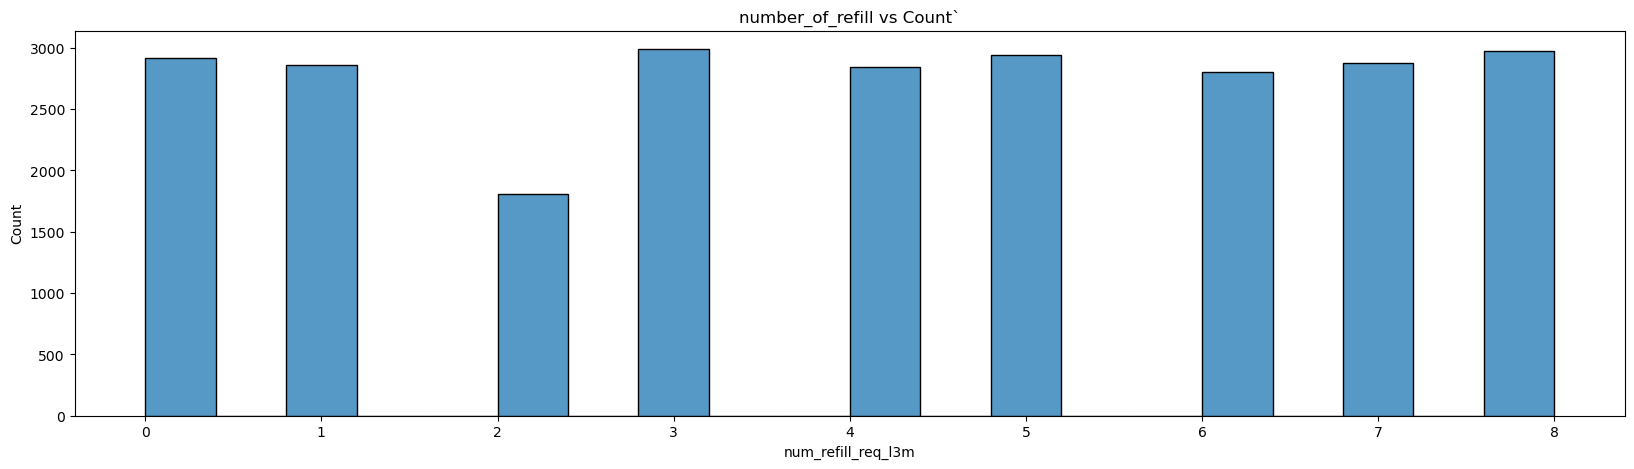

In [25]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['num_refill_req_l3m'],bins=20);

plt.title('number_of_refill vs Count`')            # title = title of plot
plt.show()

In [26]:
Supply['num_refill_req_l3m'].value_counts()


num_refill_req_l3m
3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: count, dtype: int64

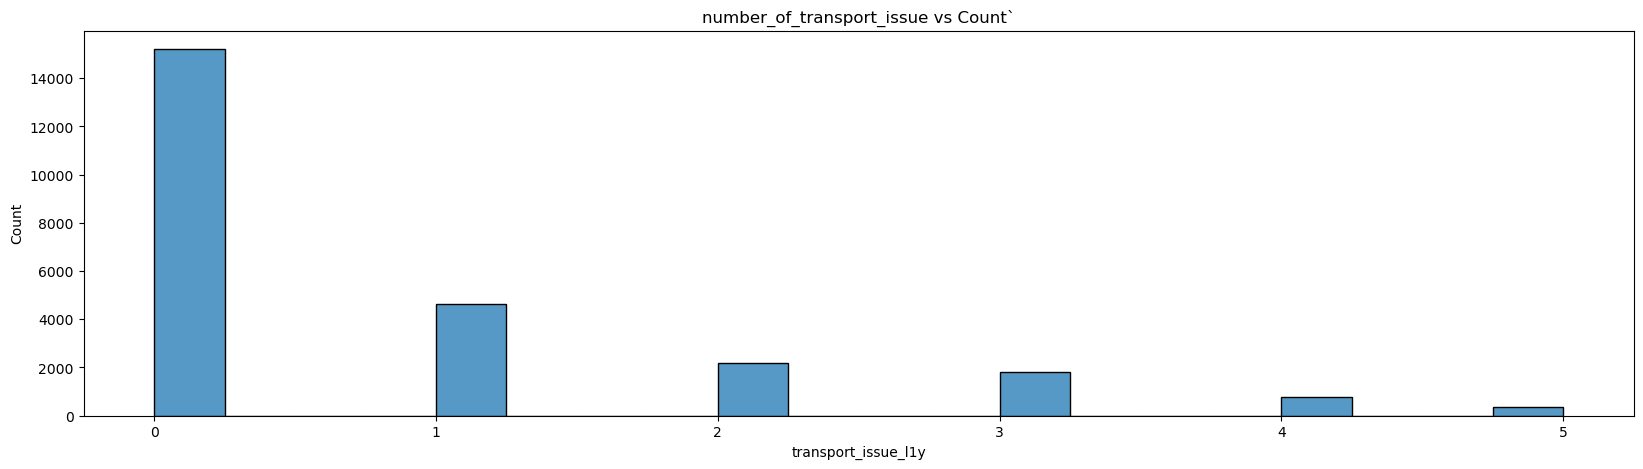

In [27]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['transport_issue_l1y'],bins=20);

plt.title('number_of_transport_issue vs Count`')            # title = title of plot
plt.show()

We can see that there are less transport issues in larger product weights shipped in last 3 months. 

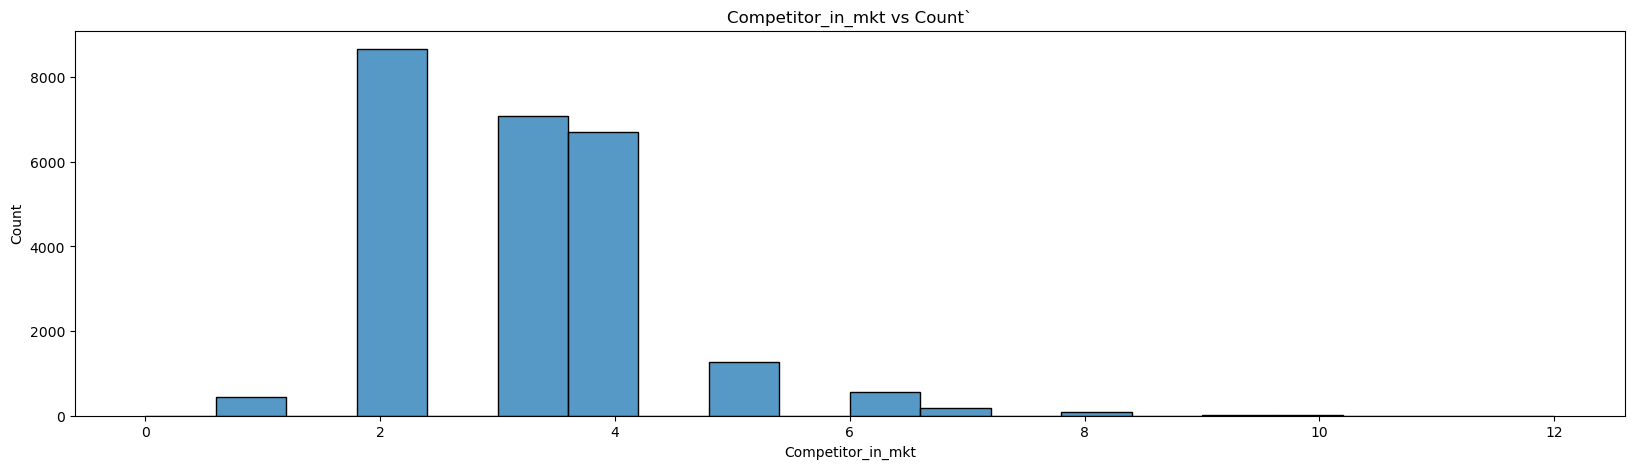

In [28]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['Competitor_in_mkt'],bins=20);

plt.title('Competitor_in_mkt vs Count`')            # title = title of plot
plt.show()

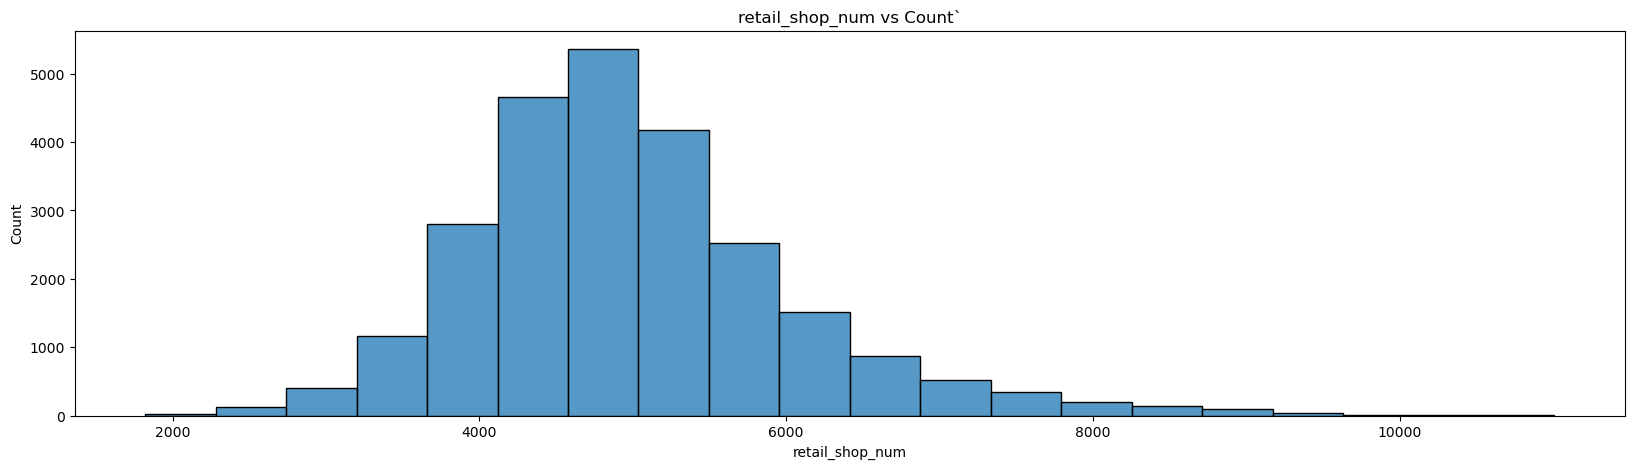

In [29]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['retail_shop_num'],bins=20);

plt.title('retail_shop_num vs Count`')            # title = title of plot
plt.show()

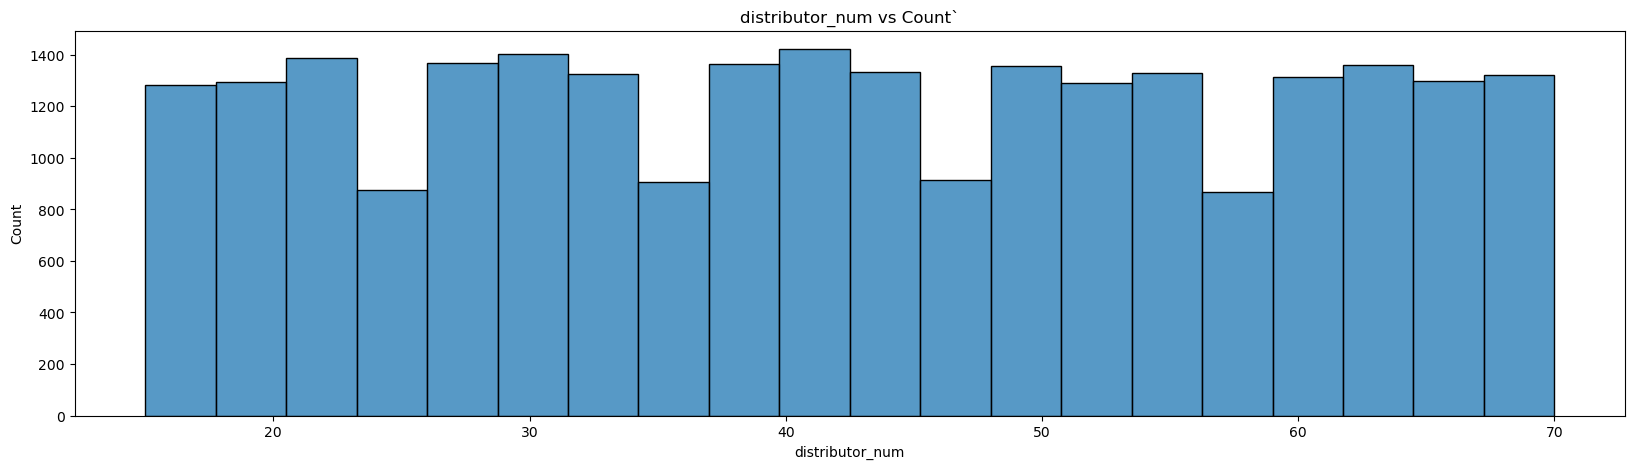

In [30]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['distributor_num'],bins=20);

plt.title('distributor_num vs Count`')            # title = title of plot
plt.show()

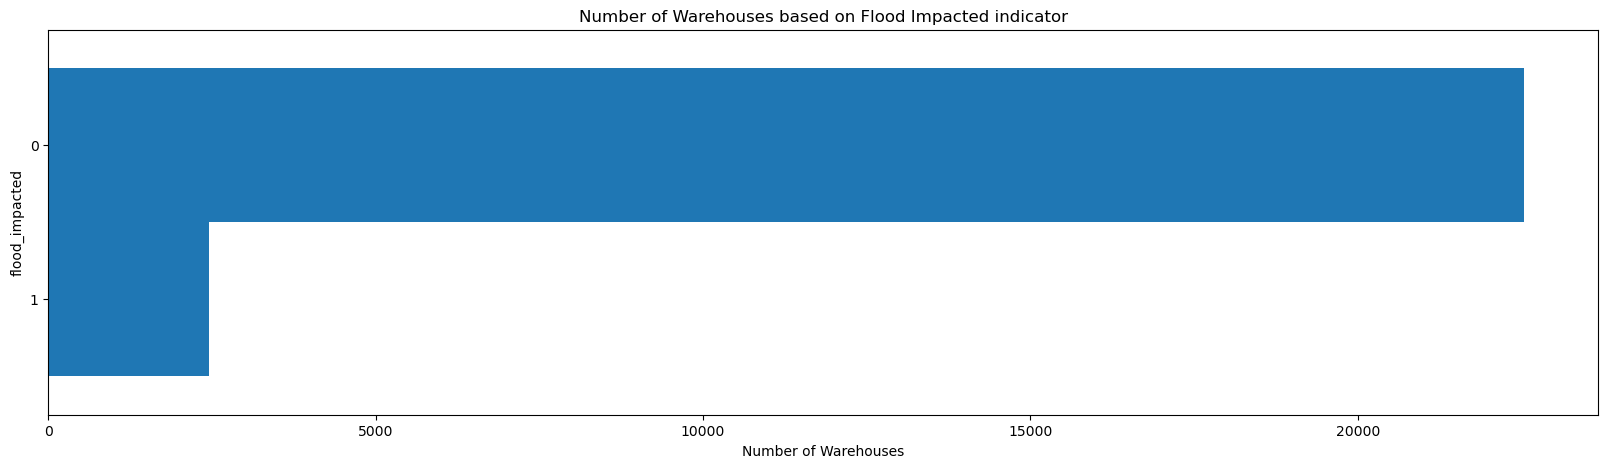

In [31]:
plt.figure(figsize=(20,5))
freq = Supply['flood_impacted'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(20, 5), width=1)
plt.title("Number of Warehouses based on Flood Impacted indicator")
plt.xlabel('Number of Warehouses')
plt.show()

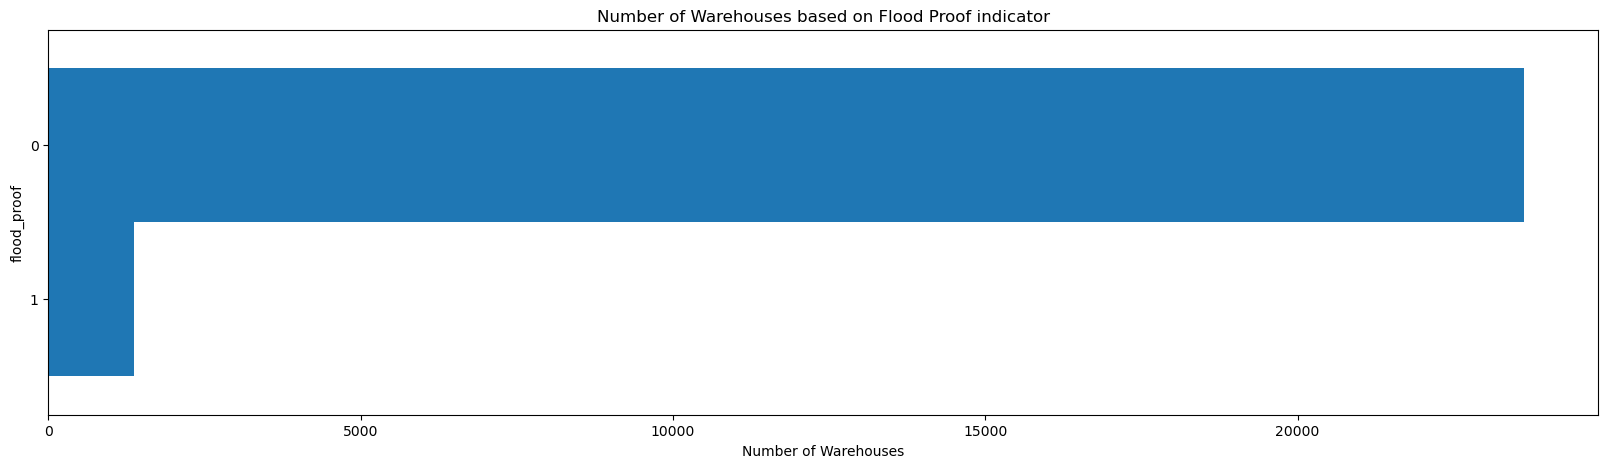

In [32]:
plt.figure(figsize=(20,5))
freq = Supply['flood_proof'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(20, 5), width=1)
plt.title("Number of Warehouses based on Flood Proof indicator")
plt.xlabel('Number of Warehouses')
plt.show()

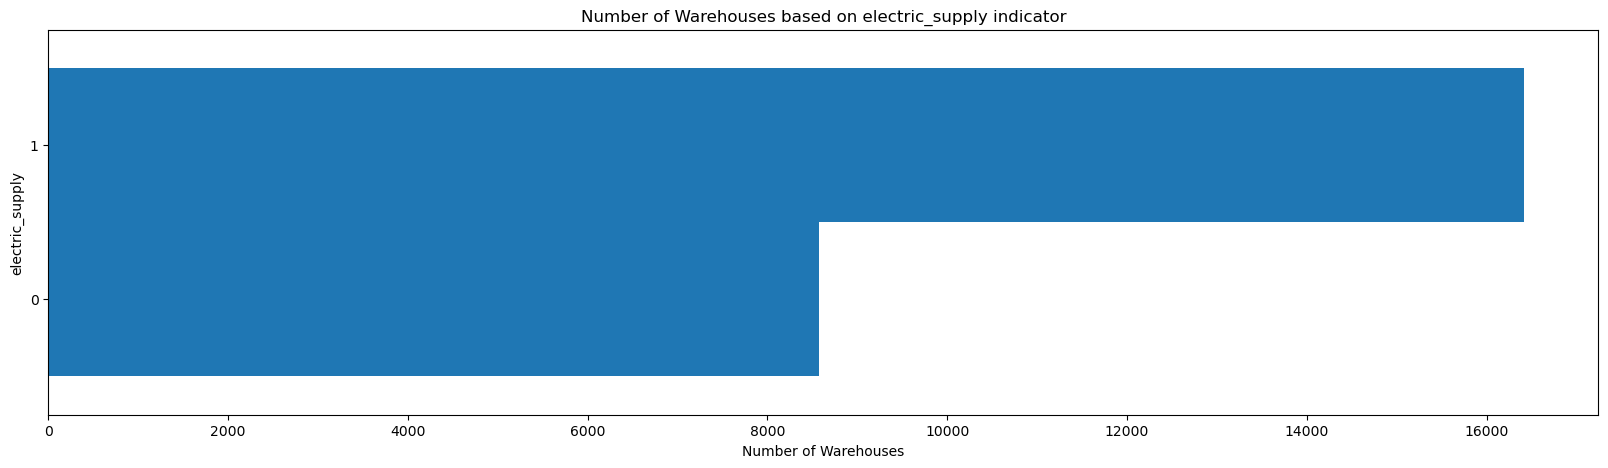

In [33]:
plt.figure(figsize=(20,5))
freq = Supply['electric_supply'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(20, 5), width=1)
plt.title("Number of Warehouses based on electric_supply indicator")
plt.xlabel('Number of Warehouses')
plt.show()

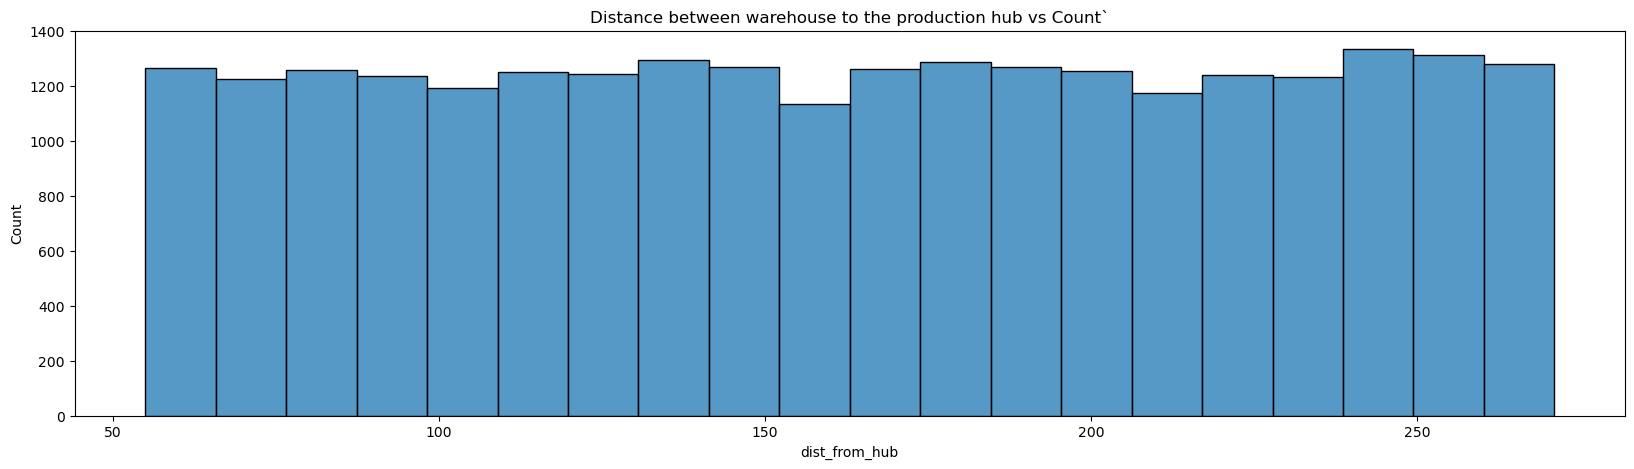

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['dist_from_hub'],bins=20);

plt.title('Distance between warehouse to the production hub vs Count`')            # title = title of plot
plt.show()

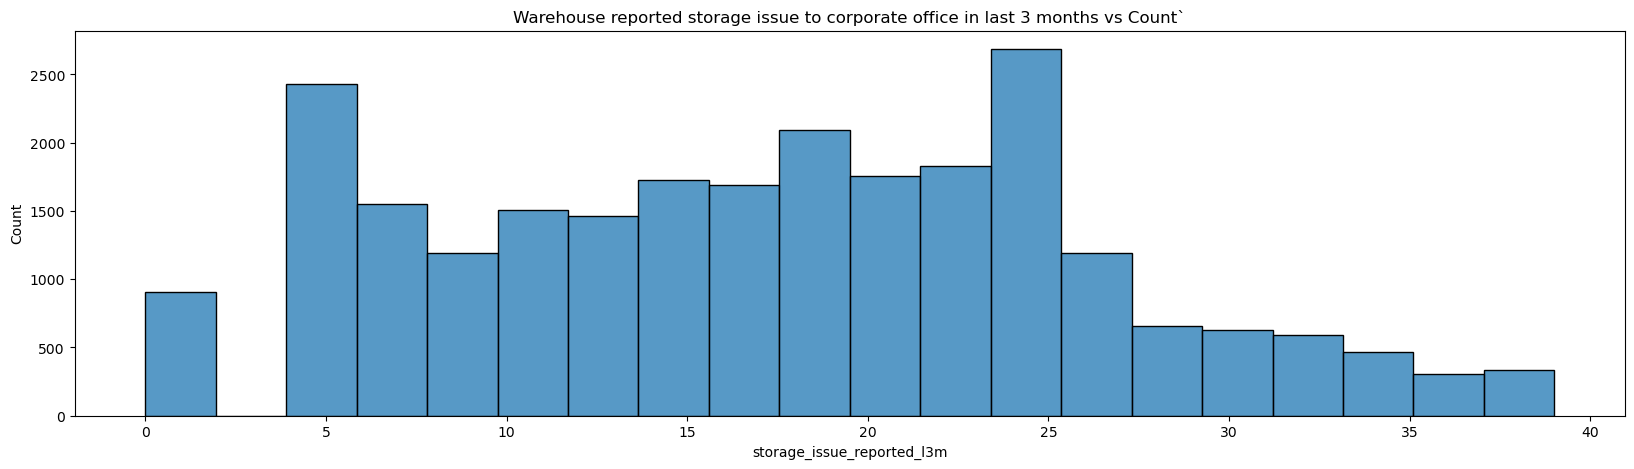

In [35]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['storage_issue_reported_l3m'],bins=20);

plt.title('Warehouse reported storage issue to corporate office in last 3 months vs Count`')            # title = title of plot
plt.show()

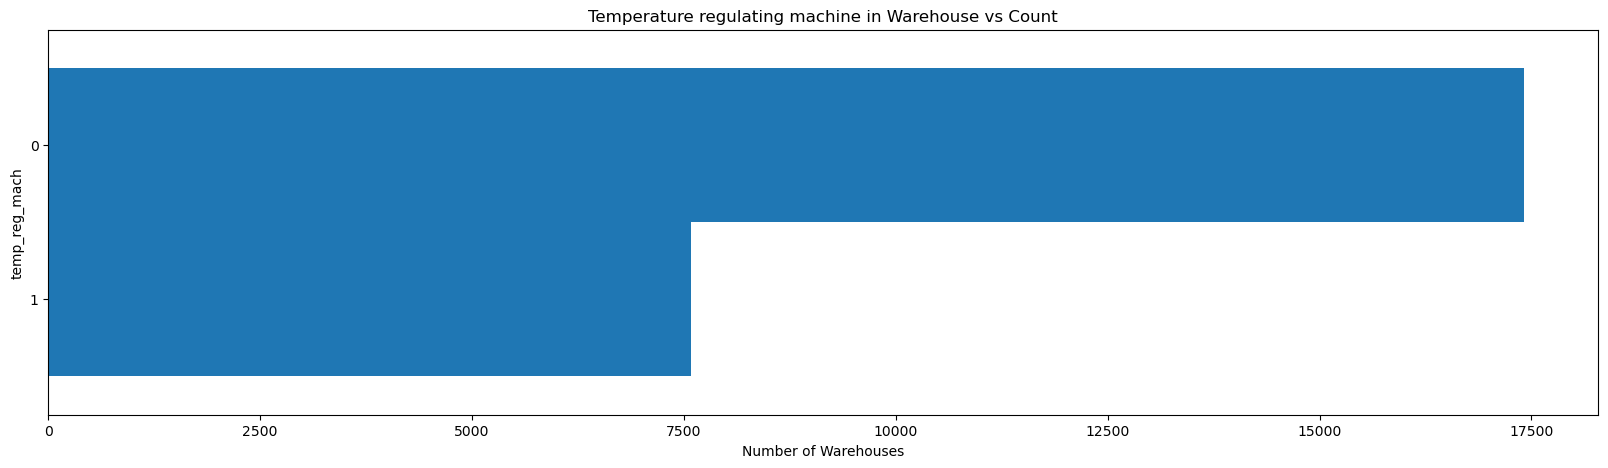

In [36]:
plt.figure(figsize=(20,5))
freq = Supply['temp_reg_mach'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(20, 5), width=1)
plt.title("Temperature regulating machine in Warehouse vs Count")
plt.xlabel('Number of Warehouses')
plt.show()

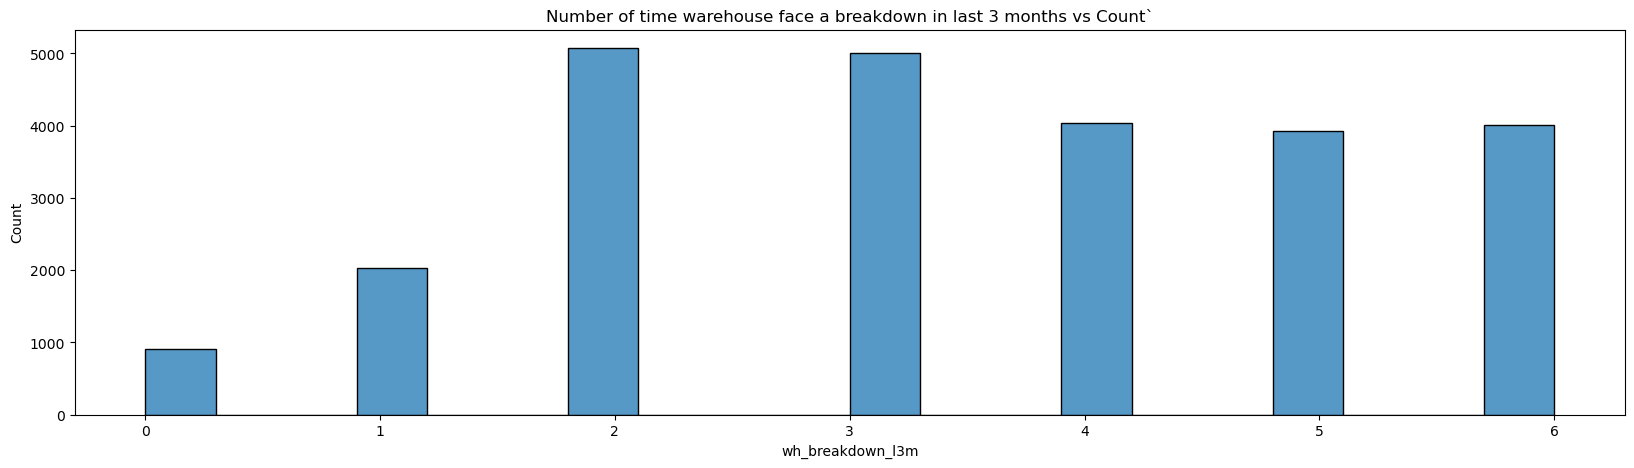

In [37]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['wh_breakdown_l3m'],bins=20);

plt.title('Number of time warehouse face a breakdown in last 3 months vs Count`')            # title = title of plot
plt.show()

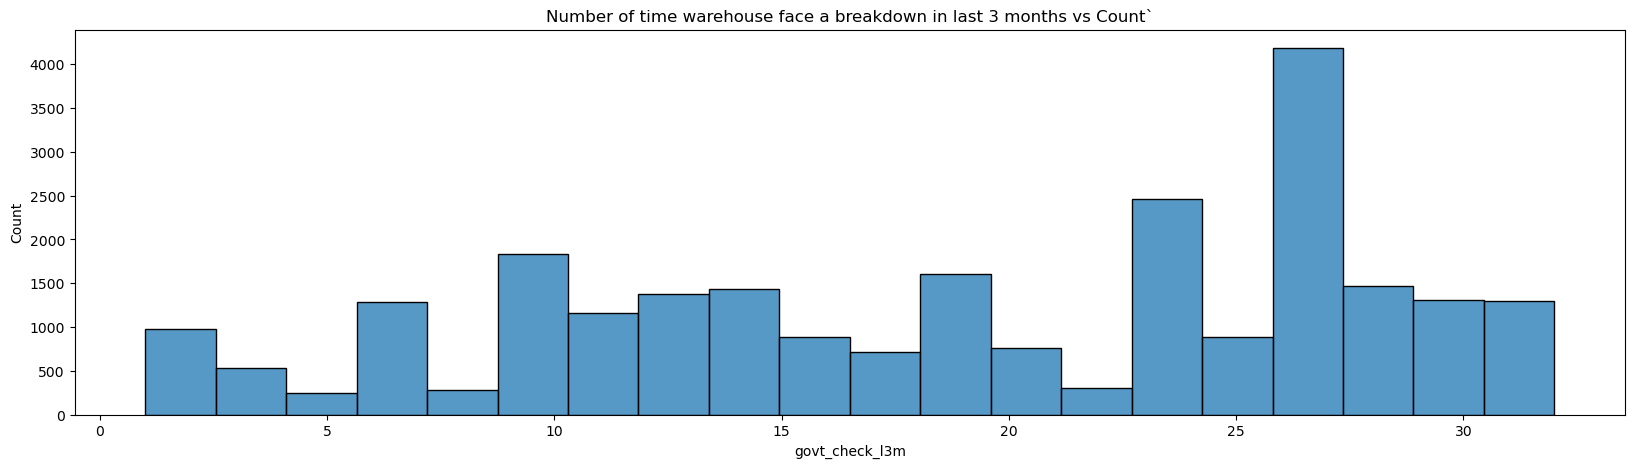

In [38]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['govt_check_l3m'],bins=20);

plt.title('Number of time warehouse face a breakdown in last 3 months vs Count`')            # title = title of plot
plt.show()

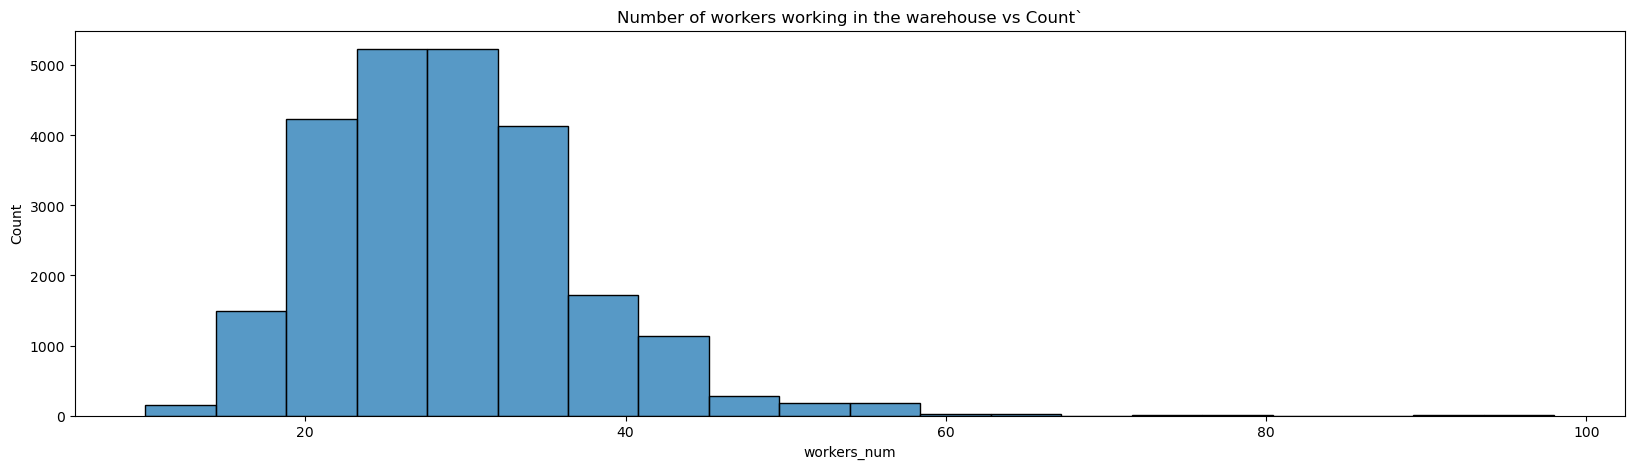

In [39]:
plt.figure(figsize=(20,5))
sns.histplot(Supply['workers_num'],bins=20);

plt.title('Number of workers working in the warehouse vs Count`')            # title = title of plot
plt.show()

## Bivariate Analysis

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\422237907.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


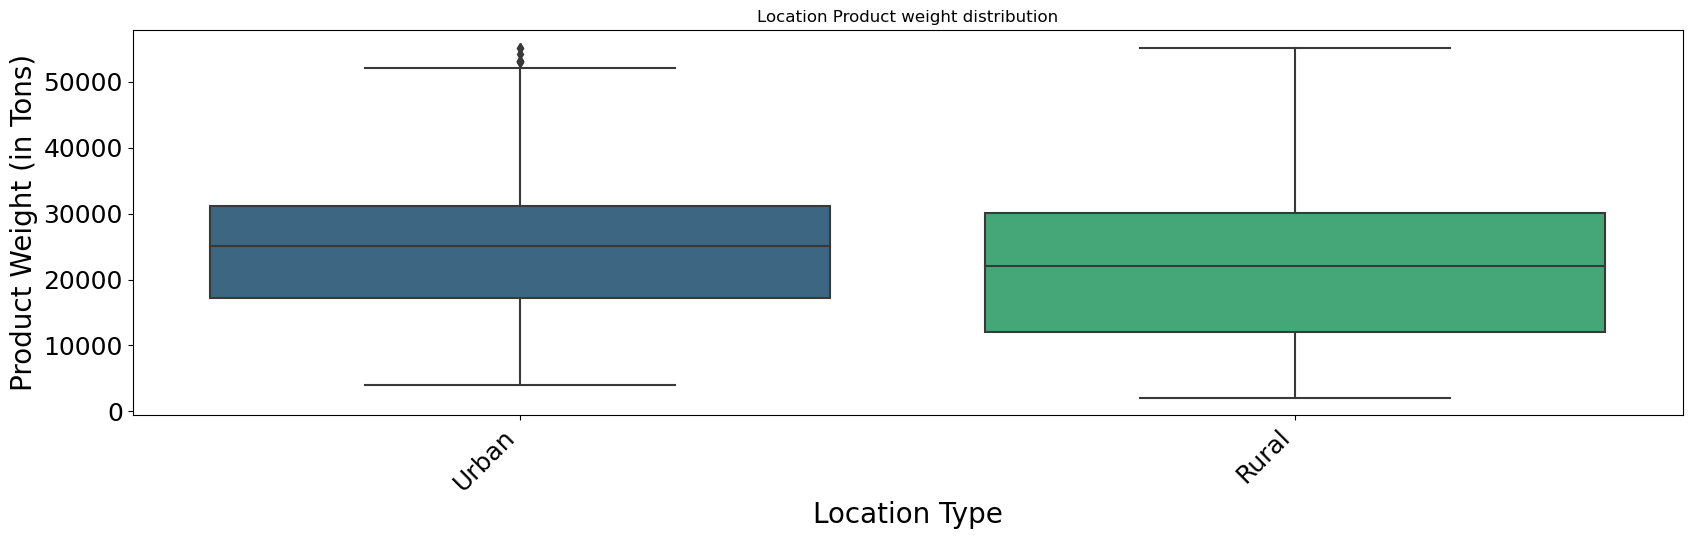

In [40]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Location_type", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('Location Type', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)


plt.title('Location Product weight distribution')
chart;



Judging from the above boxplot, Location type has no visible impact on the weight. 

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\2219401264.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


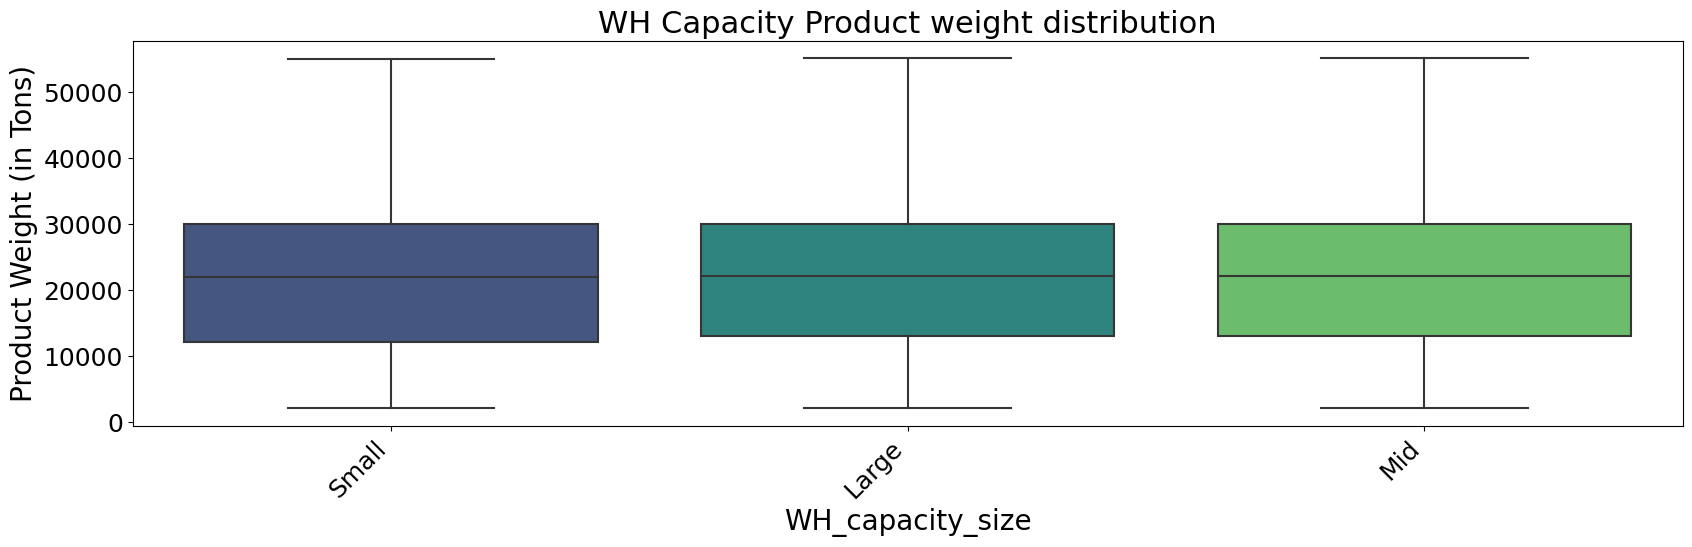

In [41]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="WH_capacity_size", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('WH_capacity_size', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)

plt.title('WH Capacity Product weight distribution',size=22)
chart;





Judging from the above boxplot, Location type has no visible impact on the weight. 

In [42]:
Supply.groupby('WH_capacity_size')['product_wg_ton'].mean()

WH_capacity_size
Large    22100.487855
Mid      22202.298104
Small    21899.591561
Name: product_wg_ton, dtype: float64

In [43]:
Supply.WH_capacity_size.value_counts()

WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64

In [44]:
Supply.zone.value_counts()

zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64

In [45]:
Supply.groupby('zone')['product_wg_ton'].sum()

zone
East       9747503
North    228165823
South    139540901
West     175111596
Name: product_wg_ton, dtype: int64

In [46]:
Supply.groupby('zone')['product_wg_ton'].mean()

zone
East     22721.452214
North    22199.437926
South    21933.495913
West     22079.384189
Name: product_wg_ton, dtype: float64

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3592458928.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


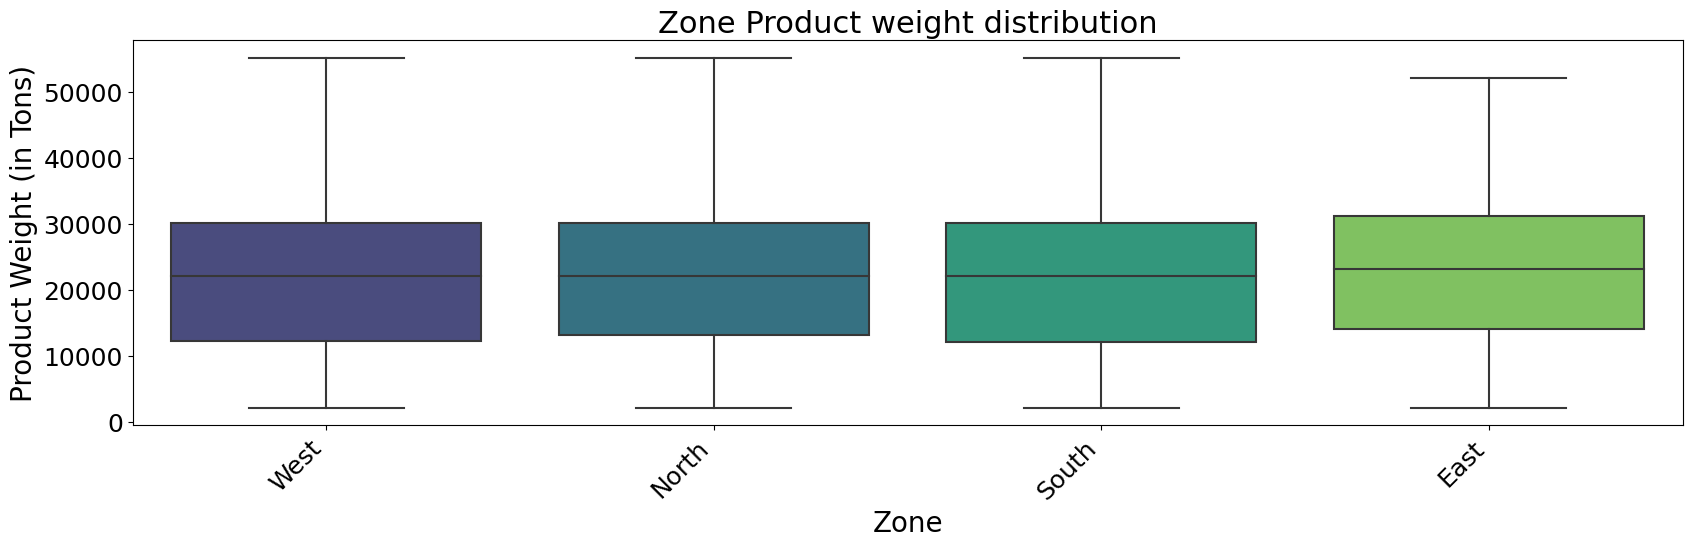

In [47]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="zone", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('Zone', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)
plt.title('Zone Product weight distribution',size=22)
chart;

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3188537930.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


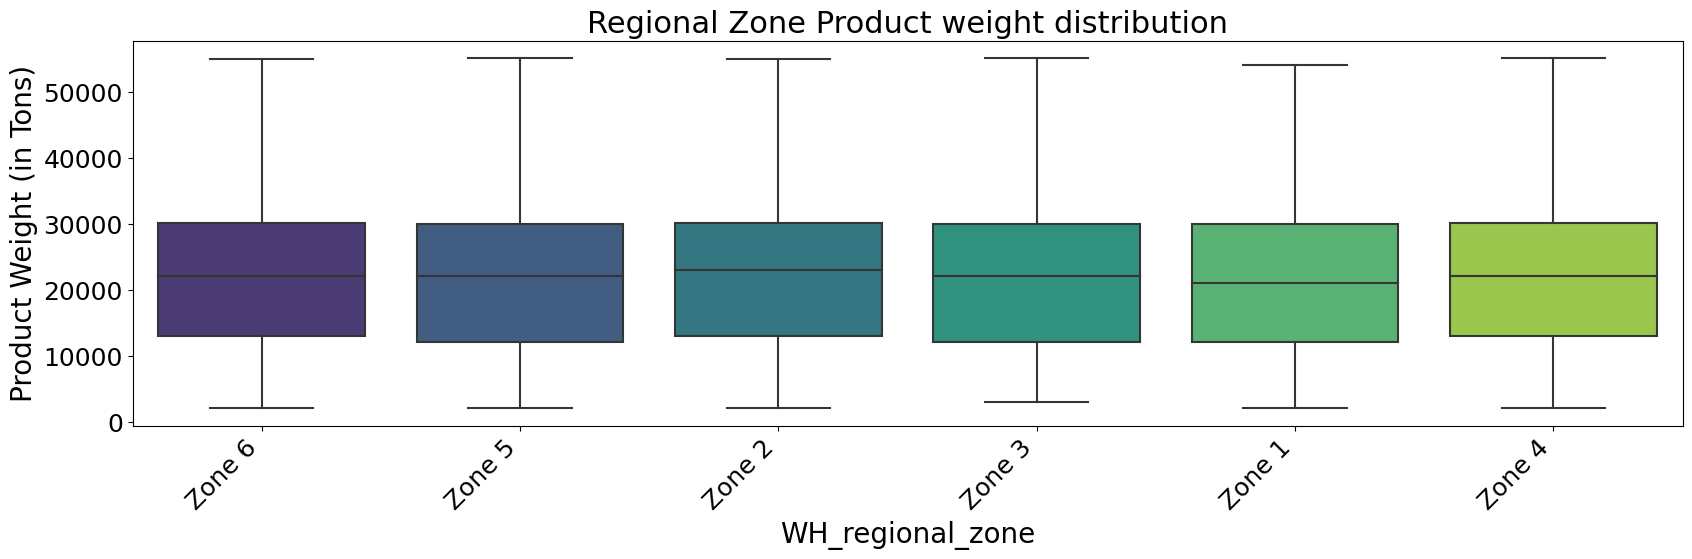

In [48]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="WH_regional_zone", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('WH_regional_zone', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)
plt.title('Regional Zone Product weight distribution',size=22)
chart;

In [49]:
Supply.WH_regional_zone.value_counts()

WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64

In [50]:
Supply.groupby('WH_regional_zone')['product_wg_ton'].sum()

WH_regional_zone
Zone 1     44659532
Zone 2     66580768
Zone 3     63290230
Zone 4     92596029
Zone 5    101017613
Zone 6    184421651
Name: product_wg_ton, dtype: int64

In [51]:
Supply.groupby('WH_regional_zone')['product_wg_ton'].mean()

WH_regional_zone
Zone 1    21742.712756
Zone 2    22470.728316
Zone 3    21968.146477
Zone 4    22173.378592
Zone 5    22022.588402
Zone 6    22115.559540
Name: product_wg_ton, dtype: float64

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\2975733635.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


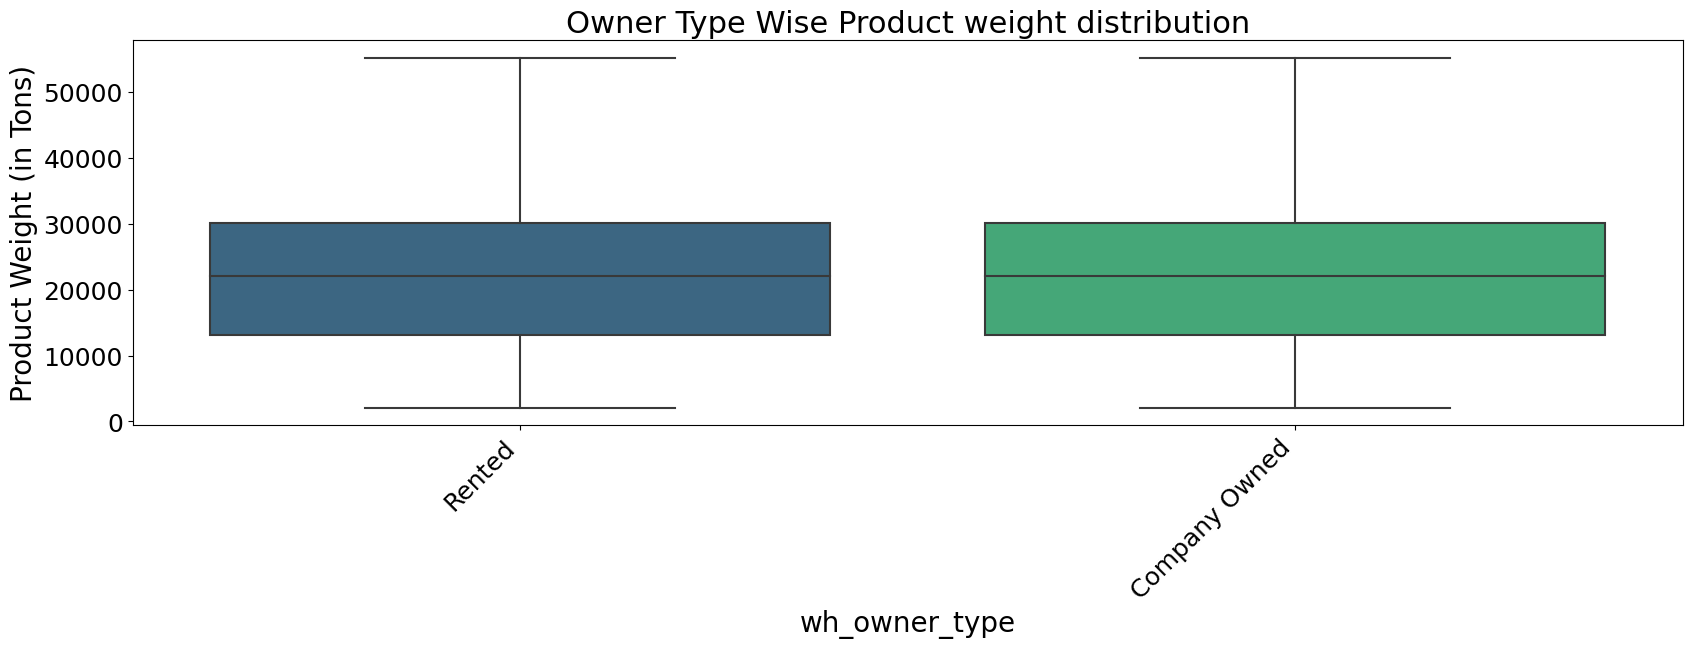

In [52]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="wh_owner_type", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('wh_owner_type', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)
plt.title('Owner Type Wise Product weight distribution',size=22)
chart;

In [53]:
Supply.wh_owner_type.value_counts()

wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64

In [54]:
Supply.groupby('wh_owner_type')['product_wg_ton'].sum()

wh_owner_type
Company Owned    299270114
Rented           253295709
Name: product_wg_ton, dtype: int64

In [55]:
Supply.groupby('wh_owner_type')['product_wg_ton'].mean()

wh_owner_type
Company Owned    22040.809692
Rented           22176.125810
Name: product_wg_ton, dtype: float64

In [56]:
Supply['product_wg_ton'].groupby(Supply['wh_owner_type']).min()

wh_owner_type
Company Owned    2065
Rented           2106
Name: product_wg_ton, dtype: int64

In [57]:
Supply['product_wg_ton'].max()

55151

C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\263502539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)


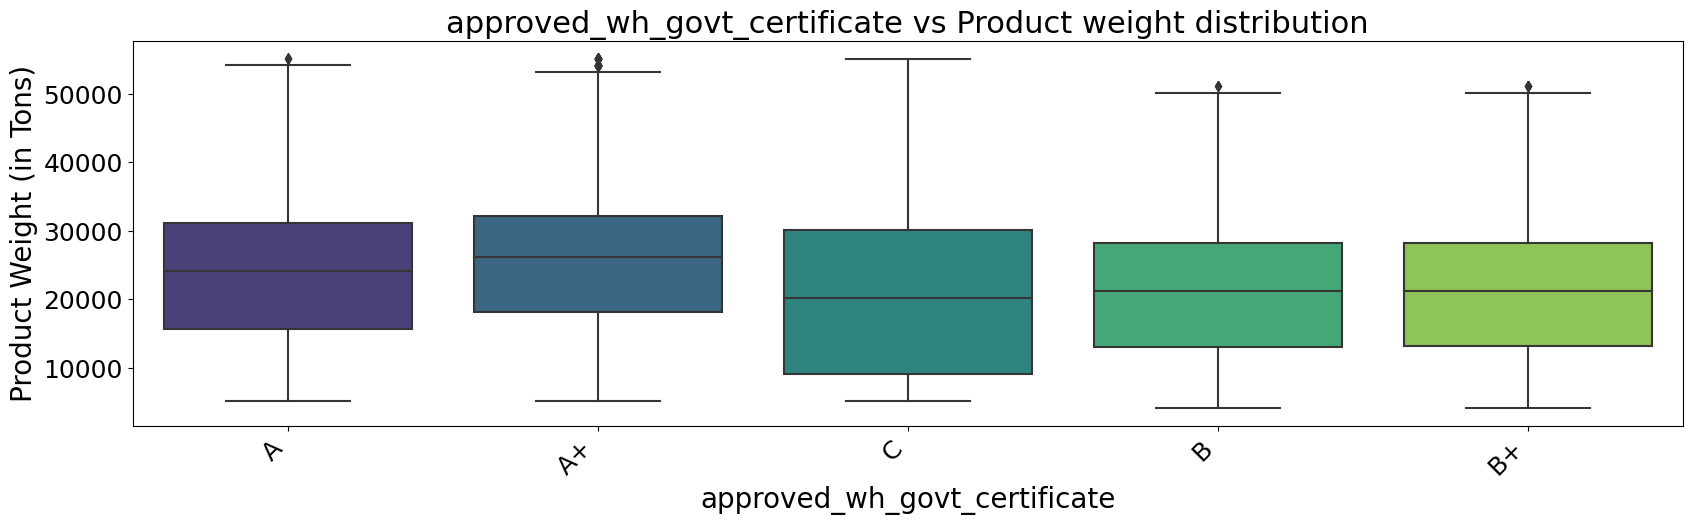

In [58]:
## Let's check if location has any weight impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="approved_wh_govt_certificate", y="product_wg_ton", data=Supply, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
chart.set_yticklabels(chart.get_yticklabels(),   fontsize=18)
plt.xlabel('approved_wh_govt_certificate', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)
plt.title('approved_wh_govt_certificate vs Product weight distribution',size=22)
chart;

<Figure size 2000x500 with 0 Axes>

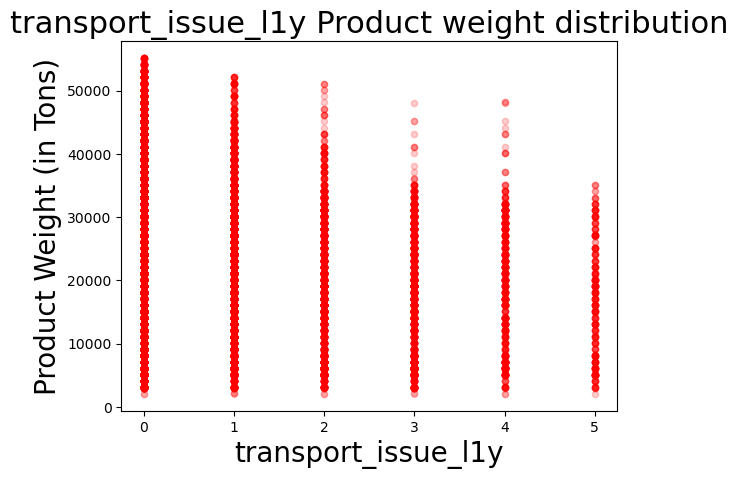

In [59]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='transport_issue_l1y', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('transport_issue_l1y', size=20)
plt.ylabel('Product Weight (in Tons)', size=20)
plt.title('transport_issue_l1y Product weight distribution',size=22)
plt.show()




In [60]:
Supply.transport_issue_l1y.value_counts()

transport_issue_l1y
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: count, dtype: int64

In [61]:
Supply.groupby('transport_issue_l1y')['product_wg_ton'].sum()

transport_issue_l1y
0    359167349
1     99133868
2     41450553
3     32129593
4     14896451
5      5788009
Name: product_wg_ton, dtype: int64

In [62]:
Supply.groupby('transport_issue_l1y')['product_wg_ton'].mean()

transport_issue_l1y
0    23606.135327
1    21346.655469
2    18858.304368
3    17673.043454
4    19171.751609
5    16632.209770
Name: product_wg_ton, dtype: float64

<Figure size 2000x500 with 0 Axes>

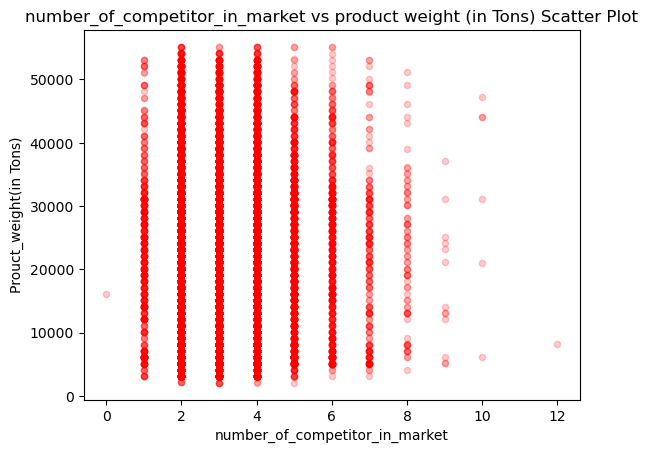

In [63]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='Competitor_in_mkt', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('number_of_competitor_in_market')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('number_of_competitor_in_market vs product weight (in Tons) Scatter Plot')            # title = title of plot
plt.show()




<Figure size 2000x500 with 0 Axes>

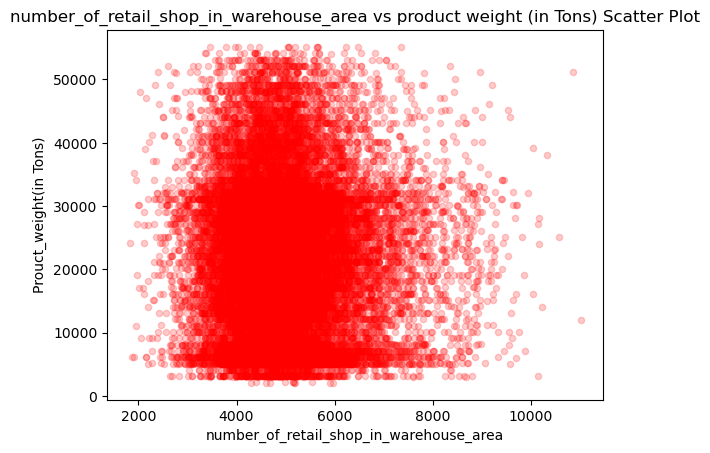

In [64]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='retail_shop_num', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('number_of_retail_shop_in_warehouse_area')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('number_of_retail_shop_in_warehouse_area vs product weight (in Tons) Scatter Plot')            # title = title of plot
plt.show()




<Figure size 2000x500 with 0 Axes>

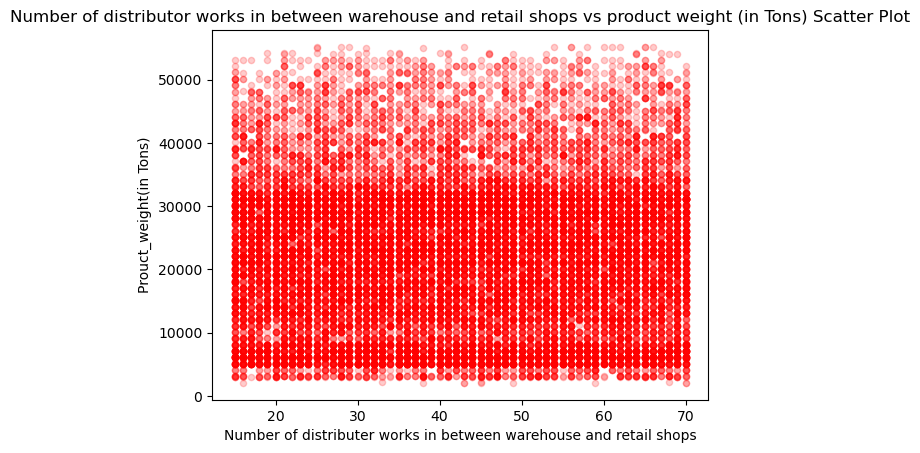

In [65]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='distributor_num', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('Number of distributer works in between warehouse and retail shops')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Number of distributor works in between warehouse and retail shops vs product weight (in Tons) Scatter Plot')            # title = title of plot
plt.show()




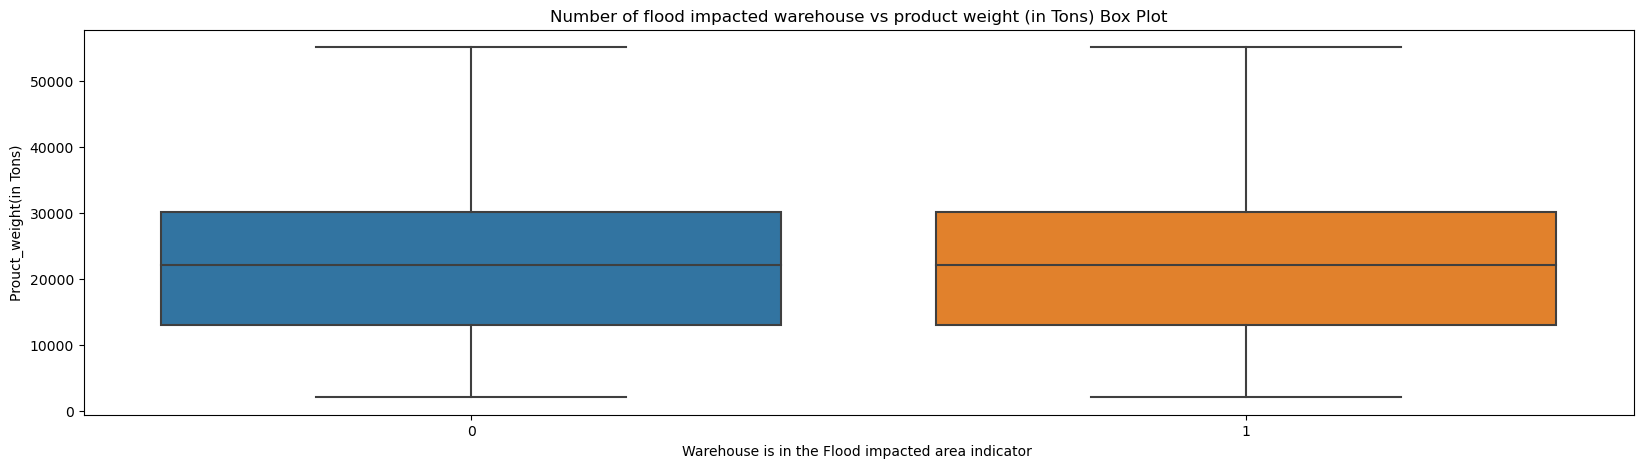

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(x='flood_impacted',y='product_wg_ton',data=Supply)
plt.xlabel('Warehouse is in the Flood impacted area indicator ')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Number of flood impacted warehouse vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()




In [67]:
Supply.flood_impacted.value_counts()

flood_impacted
0    22546
1     2454
Name: count, dtype: int64

In [68]:
Supply.groupby('flood_impacted')['product_wg_ton'].sum()

flood_impacted
0    498524452
1     54041371
Name: product_wg_ton, dtype: int64

In [69]:
Supply.groupby('flood_impacted')['product_wg_ton'].mean()

flood_impacted
0    22111.436707
1    22021.748574
Name: product_wg_ton, dtype: float64

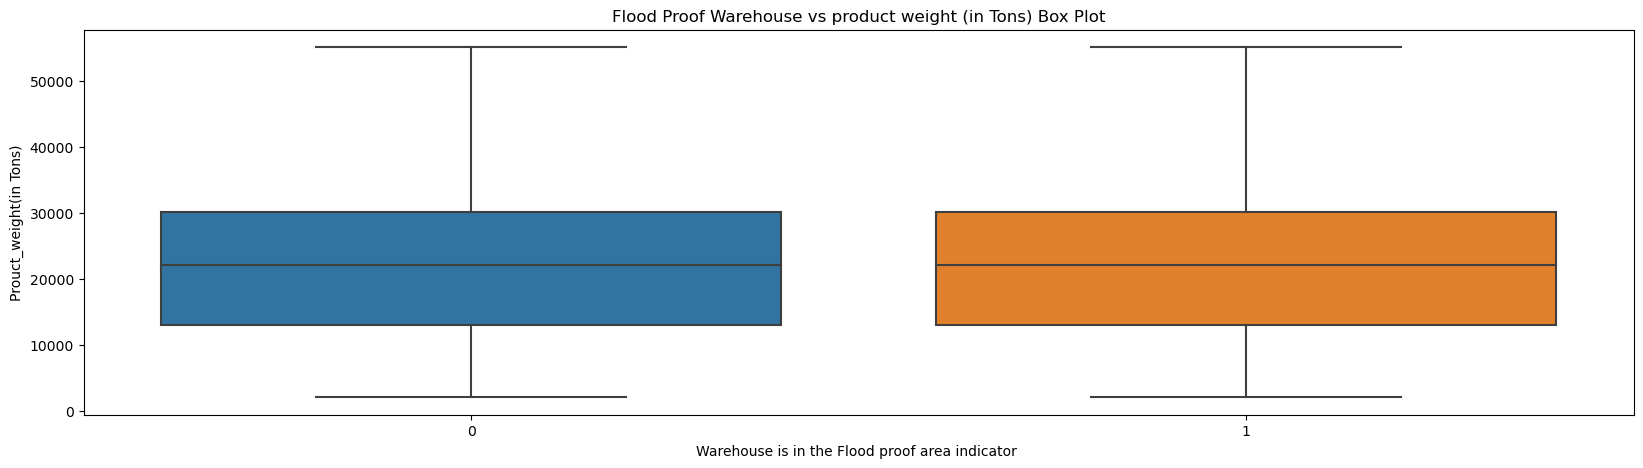

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(x='flood_proof',y='product_wg_ton',data=Supply)
plt.xlabel('Warehouse is in the Flood proof area indicator ')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Flood Proof Warehouse vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()




In [71]:
Supply.flood_proof.value_counts()

flood_proof
0    23634
1     1366
Name: count, dtype: int64

In [72]:
Supply.groupby('flood_proof')['product_wg_ton'].sum()

flood_proof
0    522402742
1     30163081
Name: product_wg_ton, dtype: int64

In [73]:
Supply.groupby('flood_proof')['product_wg_ton'].mean()

flood_proof
0    22103.864856
1    22081.318448
Name: product_wg_ton, dtype: float64

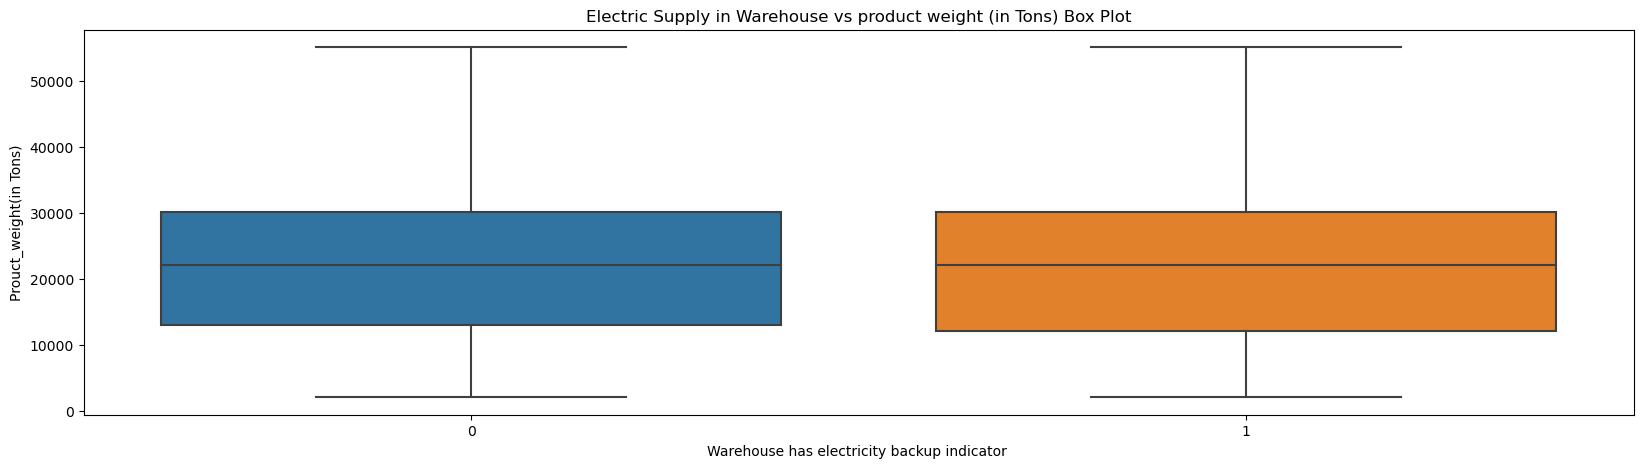

In [74]:
plt.figure(figsize=(20,5))
sns.boxplot(x='electric_supply',y='product_wg_ton',data=Supply)
plt.xlabel('Warehouse has electricity backup indicator ')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Electric Supply in Warehouse vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()




In [75]:
Supply.electric_supply.value_counts()

electric_supply
1    16422
0     8578
Name: count, dtype: int64

In [76]:
Supply.groupby('electric_supply')['product_wg_ton'].sum()

electric_supply
0    189893936
1    362671887
Name: product_wg_ton, dtype: int64

In [77]:
Supply.groupby('electric_supply')['product_wg_ton'].mean()

electric_supply
0    22137.320588
1    22084.513884
Name: product_wg_ton, dtype: float64

<Figure size 2000x500 with 0 Axes>

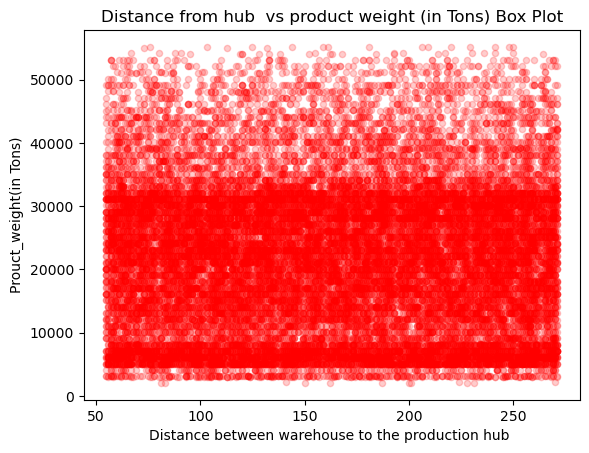

In [78]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='dist_from_hub', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('Distance between warehouse to the production hub ')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Distance from hub  vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()






In [79]:
Supply.dist_from_hub.value_counts()

dist_from_hub
239    144
84     142
209    140
258    140
204    140
      ... 
95      94
124     94
130     94
138     93
88      92
Name: count, Length: 217, dtype: int64

In [80]:
Supply.groupby('dist_from_hub')['product_wg_ton'].sum()

dist_from_hub
55     2380004
56     2438433
57     2728811
58     2671144
59     2400590
        ...   
267    2592439
268    2822257
269    2654003
270    2778873
271    3121551
Name: product_wg_ton, Length: 217, dtype: int64

In [81]:
Supply.groupby('dist_from_hub')['product_wg_ton'].mean()

dist_from_hub
55     22884.653846
56     21967.864865
57     21657.230159
58     21894.622951
59     21244.159292
           ...     
267    21076.739837
268    23324.438017
269    21232.024000
270    21541.651163
271    24011.930769
Name: product_wg_ton, Length: 217, dtype: float64

<Figure size 2000x500 with 0 Axes>

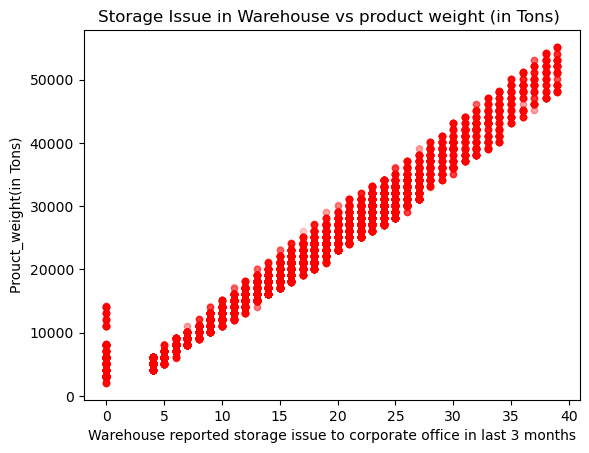

In [82]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='storage_issue_reported_l3m', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('Warehouse reported storage issue to corporate office in last 3 months')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Storage Issue in Warehouse vs product weight (in Tons) ')             # title = title of plot
plt.show()






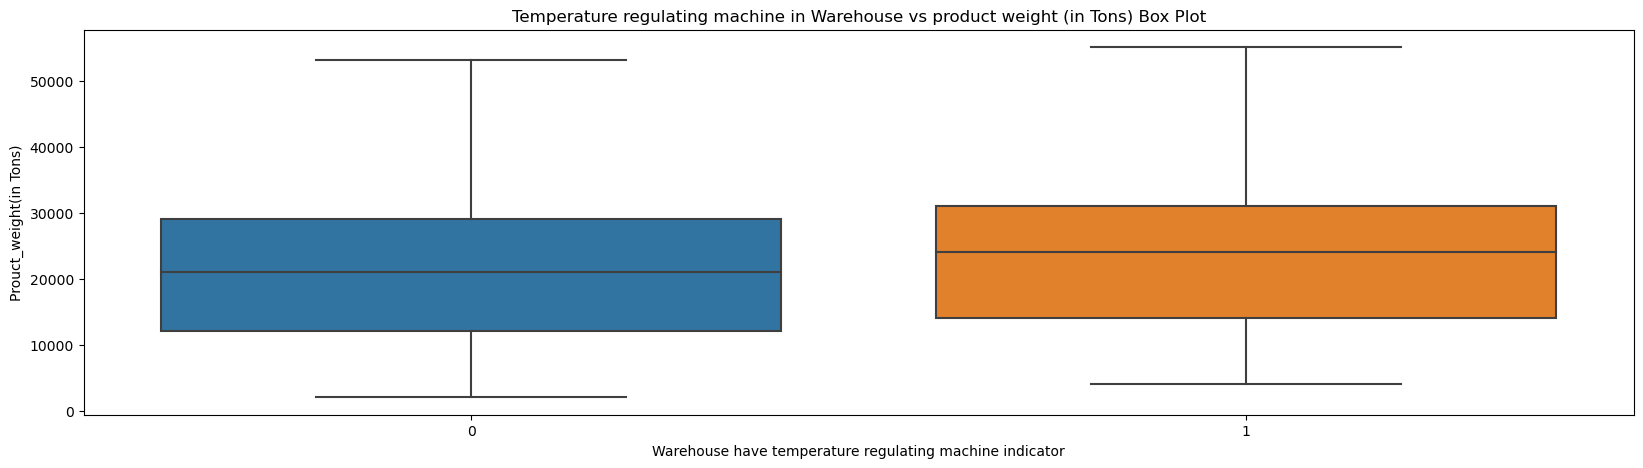

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='temp_reg_mach',y='product_wg_ton',data=Supply)
plt.xlabel('Warehouse have temperature regulating machine indicator')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Temperature regulating machine in Warehouse vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()




In [84]:
Supply.temp_reg_mach.value_counts()

temp_reg_mach
0    17418
1     7582
Name: count, dtype: int64

In [85]:
Supply.groupby('temp_reg_mach')['product_wg_ton'].sum()

temp_reg_mach
0    371425974
1    181139849
Name: product_wg_ton, dtype: int64

In [86]:
Supply.groupby('temp_reg_mach')['product_wg_ton'].mean()

temp_reg_mach
0    21324.260765
1    23890.774070
Name: product_wg_ton, dtype: float64

<Figure size 2000x500 with 0 Axes>

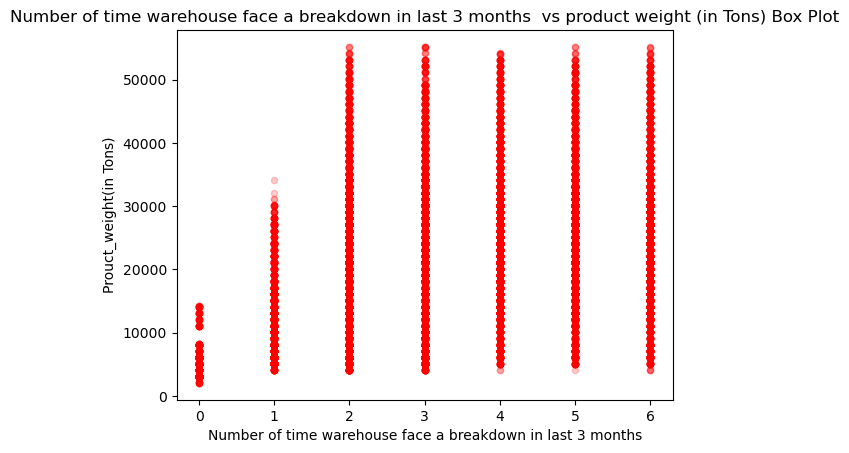

In [87]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='wh_breakdown_l3m', y='product_wg_ton',alpha = 0.2,color = 'red')
plt.xlabel('Number of time warehouse face a breakdown in last 3 months')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Number of time warehouse face a breakdown in last 3 months  vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()






<Figure size 2000x500 with 0 Axes>

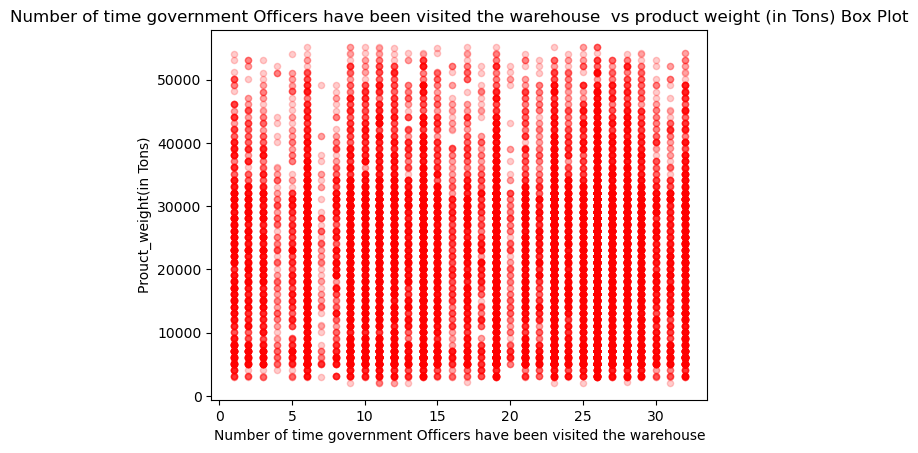

In [88]:
plt.figure(figsize=(20,5))
Supply.plot(kind='scatter', x='govt_check_l3m', y='product_wg_ton',alpha = 0.2,color = 'red')

plt.xlabel('Number of time government Officers have been visited the warehouse')              # label = name of label
plt.ylabel('Prouct_weight(in Tons)')
plt.title('Number of time government Officers have been visited the warehouse  vs product weight (in Tons) Box Plot')            # title = title of plot
plt.show()






In [89]:
Supply.govt_check_l3m.value_counts()

govt_check_l3m
26    2908
23    1828
19    1604
28    1465
14    1429
27    1277
6     1224
11    1160
12     947
32     940
9      932
29     901
10     899
25     884
15     689
21     649
24     628
1      550
17     497
3      438
2      431
13     429
30     404
31     362
22     309
8      276
5      250
18     217
16     201
20     108
4       99
7       65
Name: count, dtype: int64

In [90]:
Supply.groupby('govt_check_l3m')['product_wg_ton'].sum()

govt_check_l3m
1     12258019
2      9565090
3      9740051
4      2197215
5      5388430
6     27593098
7      1299843
8      6111385
9     20461622
10    19588440
11    25679253
12    21561981
13     9496130
14    31892835
15    15065176
16     4508774
17    11138992
18     4839365
19    35595929
20     2235045
21    14129378
22     6819506
23    41001490
24    14046470
25    18962446
26    64681731
27    27694301
28    31869593
29    19761009
30     8801113
31     7480216
32    21101897
Name: product_wg_ton, dtype: int64

In [91]:
Supply.groupby('govt_check_l3m')['product_wg_ton'].mean()

govt_check_l3m
1     22287.307273
2     22192.784223
3     22237.559361
4     22194.090909
5     21553.720000
6     22543.380719
7     19997.584615
8     22142.699275
9     21954.530043
10    21789.143493
11    22137.287069
12    22768.723337
13    22135.501166
14    22318.289013
15    21865.277213
16    22431.711443
17    22412.458753
18    22301.221198
19    22191.975686
20    20694.861111
21    21770.998459
22    22069.598706
23    22429.699125
24    22366.990446
25    21450.730769
26    22242.686039
27    21687.001566
28    21753.988396
29    21932.307436
30    21784.933168
31    20663.580110
32    22448.826596
Name: product_wg_ton, dtype: float64

In [92]:
cont=Supply.dtypes[(Supply.dtypes!='object') ].index

In [93]:
cont

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [94]:
cont=cont.drop(['flood_impacted','flood_proof'])

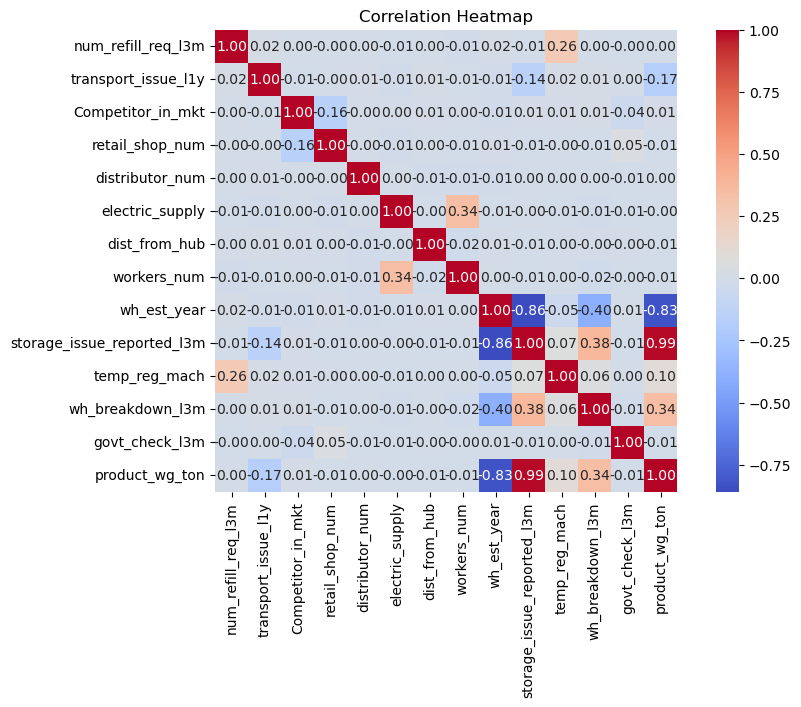

In [95]:


correlation_matrix = Supply[cont].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

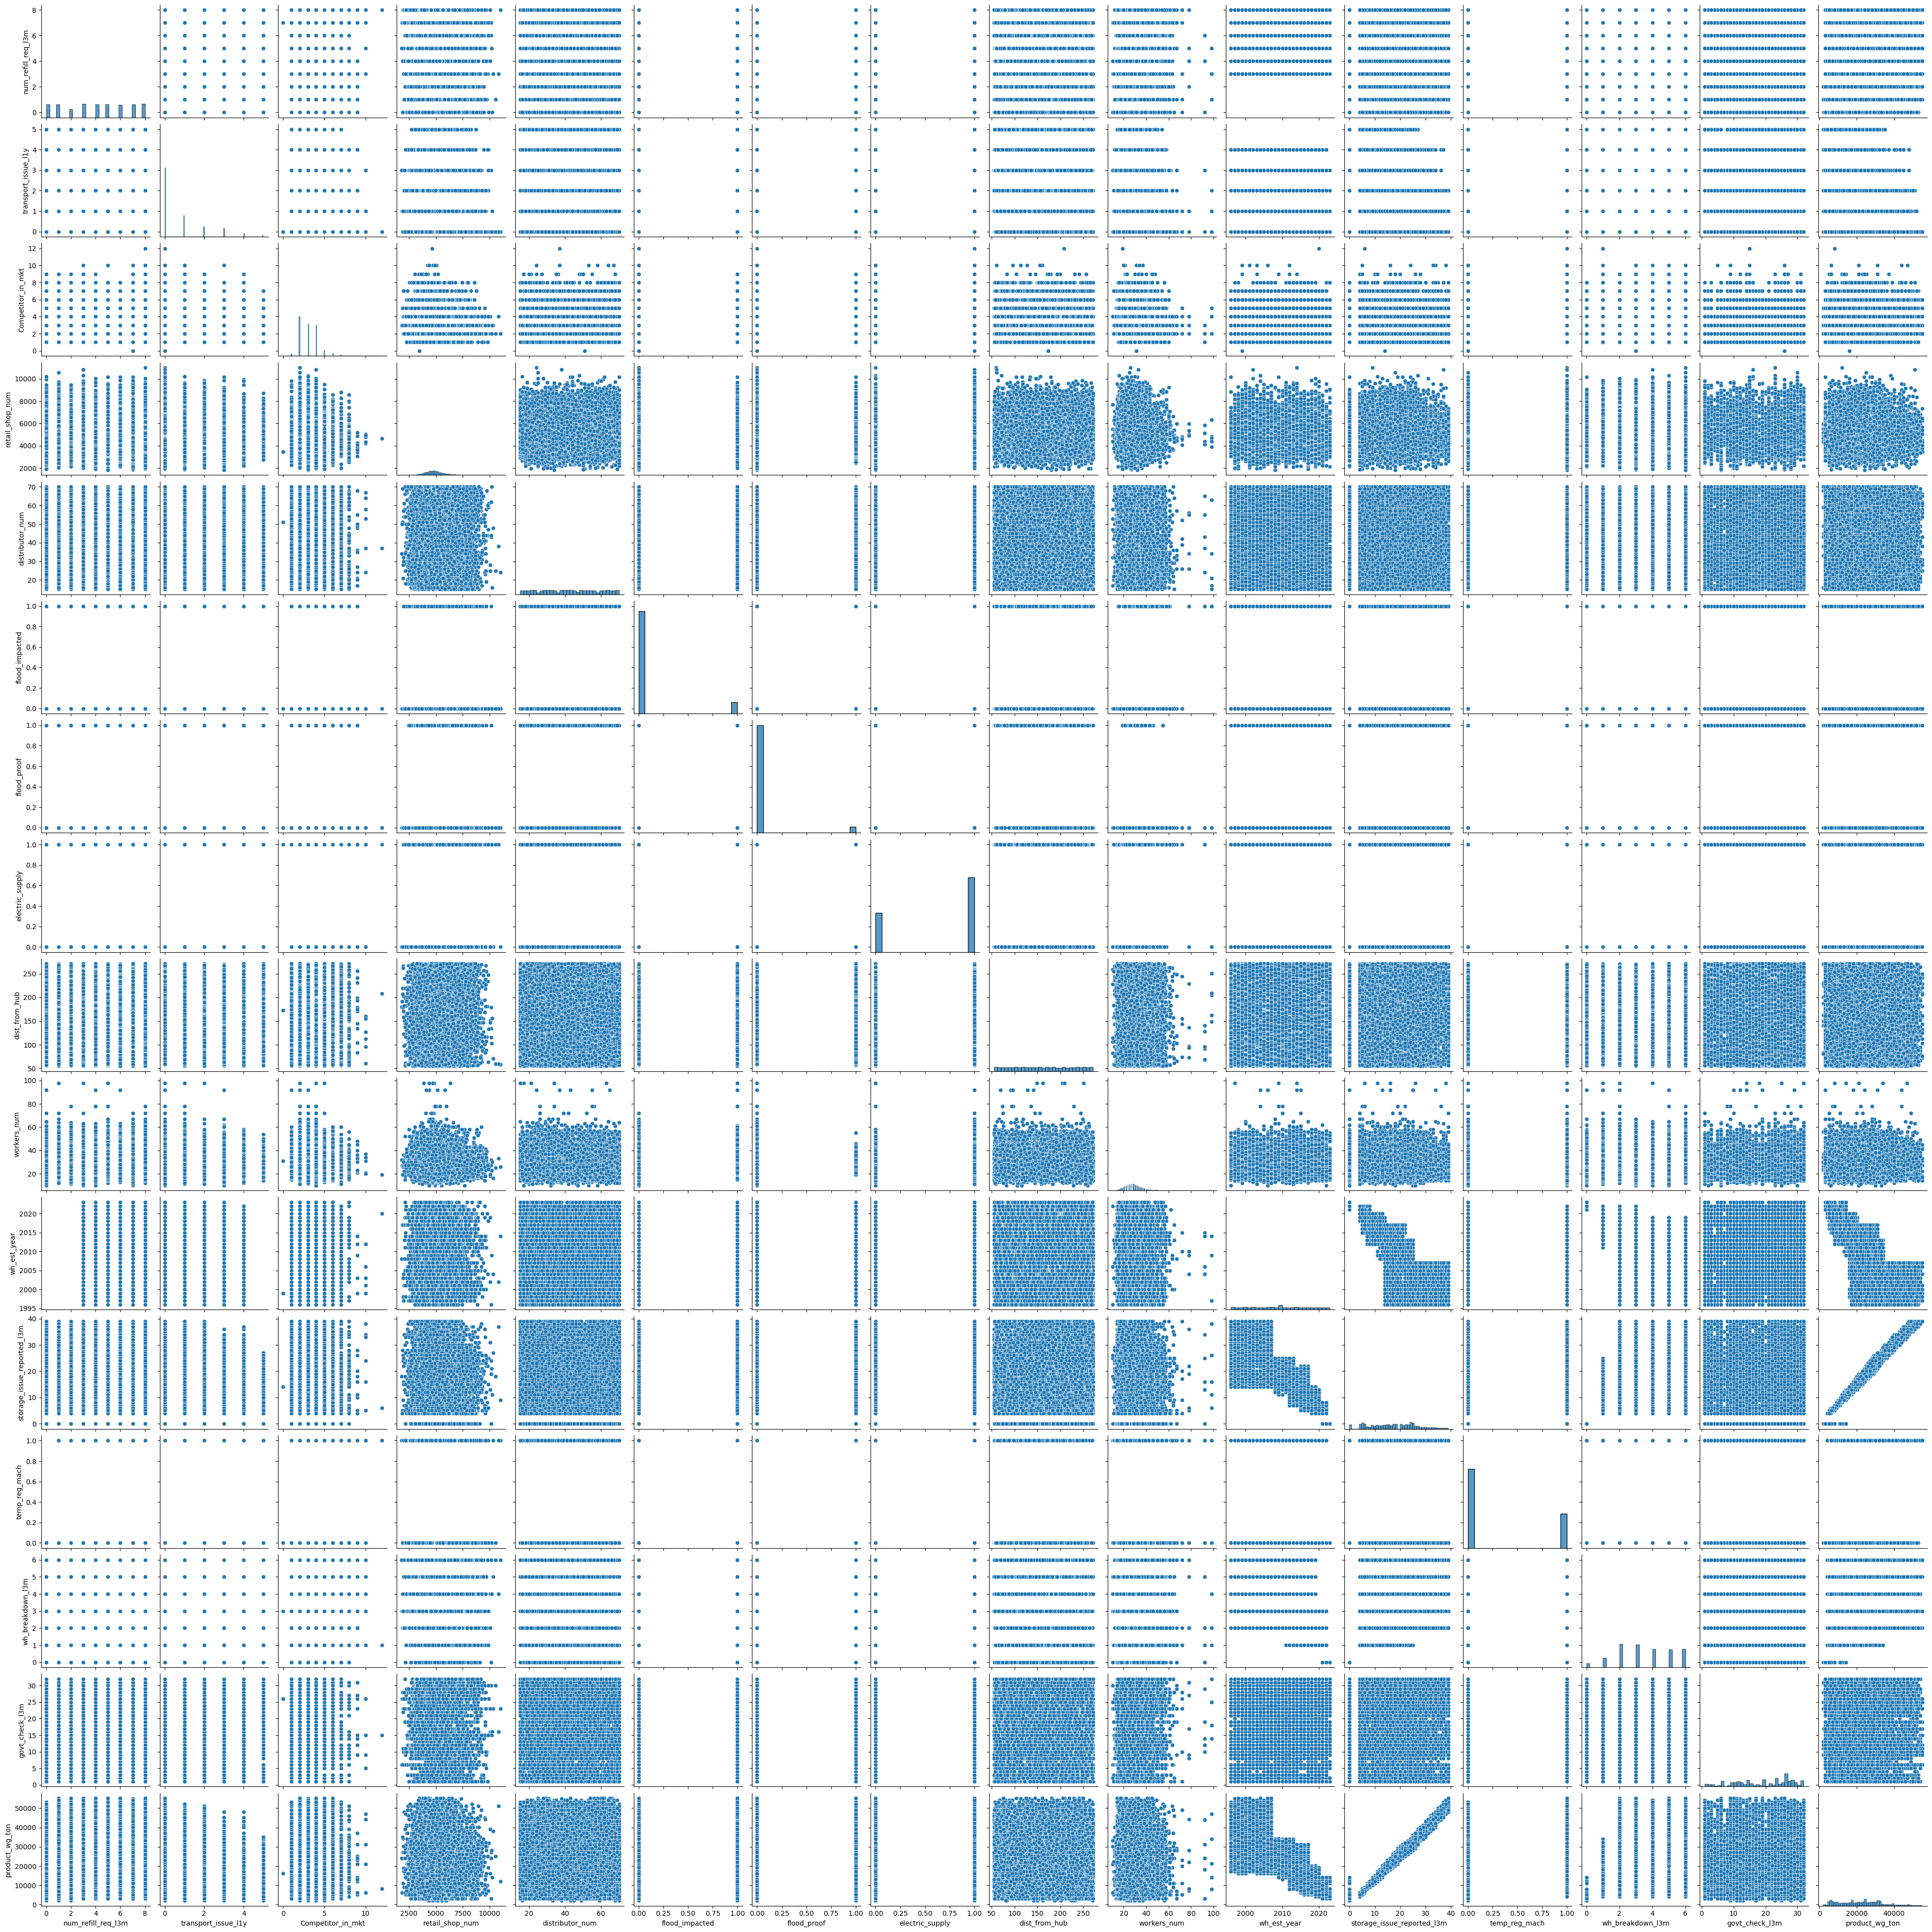

In [96]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=Supply)

In [97]:
Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

## Finding Missing Values

In [98]:
Supply_na = Supply.isna().sum()
Supply_na[Supply_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

## Missing Value Treatment

In [99]:
Supply['wh_owner_type'].loc[Supply['wh_est_year'].isnull()].value_counts()

wh_owner_type
Company Owned    6488
Rented           5393
Name: count, dtype: int64

wh_est_year                     11881

All these features have high percentage of missing values and hence these features would be dropped from analysis. We are dropping them from our dataset to make sure that other valid observations do not get eliminated when we remove or impute the 'na' values.


In [100]:
Supply.drop(['wh_est_year'],axis='columns', inplace=True)

In [101]:
Supply['workers_num']

0        29.0
1        31.0
2        37.0
3        21.0
4        25.0
         ... 
24995    34.0
24996    28.0
24997     NaN
24998    25.0
24999    39.0
Name: workers_num, Length: 25000, dtype: float64

In [102]:
Supply['approved_wh_govt_certificate']

0         A
1         A
2         A
3        A+
4         C
         ..
24995     A
24996     B
24997    B+
24998     A
24999    B+
Name: approved_wh_govt_certificate, Length: 25000, dtype: object

In [103]:
Supply['workers_num'] = Supply['workers_num'].fillna(Supply['workers_num'].mean())
Supply['approved_wh_govt_certificate'] = Supply['approved_wh_govt_certificate'].fillna(Supply['approved_wh_govt_certificate'].mode()[0])




In [104]:
Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [105]:
Supply.describe()["product_wg_ton"]

count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

In [106]:
Supply["product_wg_ton"].value_counts().sort_index()

product_wg_ton
2065     1
2083     1
2093     1
2103     1
2104     1
        ..
55120    1
55132    1
55144    1
55150    1
55151    1
Name: count, Length: 4561, dtype: int64

In [107]:
print("0.5% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 0.5)))
print("  1% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 1)))
print("  5% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 5)))
print(" 10% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 10)))
print(" 90% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 90)))
print(" 95% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 95)))
print(" 99% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 99)))
print("99.5% product have a weight lower than {0: .2f}".format(np.percentile(Supply["product_wg_ton"], 99.5)))

0.5% product have a weight lower than  3090.99
  1% product have a weight lower than  3130.00
  5% product have a weight lower than  5128.00
 10% product have a weight lower than  6134.00
 90% product have a weight lower than  37147.00
 95% product have a weight lower than  43113.00
 99% product have a weight lower than  51075.02
99.5% product have a weight lower than  52117.01


In [108]:
#Supply = Supply[(Supply.product_wg_ton > 1 ) & (Supply.product_wg_ton < 51075 )] 

## Drop unnecessary columns : WH_Manager_ID,Ware_house_ID

In [109]:
Supply.drop(['Ware_house_ID','WH_Manager_ID'],axis='columns',inplace=True)

In [110]:
cont=Supply.dtypes[(Supply.dtypes!='object') ].index

In [111]:
Q1 = Supply[cont].quantile(0.25)
Q3 = Supply[cont].quantile(0.75)
IQR = Q3 - Q1

In [112]:
((Supply[cont] < (Q1 - 1.5 * IQR)) | (Supply[cont] > (Q3 + 1.5 * IQR))).sum()

num_refill_req_l3m               0
transport_issue_l1y           2943
Competitor_in_mkt               96
retail_shop_num                948
distributor_num                  0
flood_impacted                2454
flood_proof                   1366
electric_supply                  0
dist_from_hub                    0
workers_num                    607
storage_issue_reported_l3m       0
temp_reg_mach                    0
wh_breakdown_l3m                 0
govt_check_l3m                   0
product_wg_ton                   0
dtype: int64

In [113]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [114]:
cont

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [115]:
for column in cont:
    if column=='workers_num':
        print(column)
        lr,ur=remove_outlier(Supply[column])
        print(lr,ur)
        
    lr,ur=remove_outlier(Supply[column])
    Supply[column]=np.where(Supply[column]>ur,ur,Supply[column])
    Supply[column]=np.where(Supply[column]<lr,lr,Supply[column])

workers_num
10.5 46.5


In [116]:
((Supply[cont] < (Q1 - 1.5 * IQR)) | (Supply[cont] > (Q3 + 1.5 * IQR))).sum()

num_refill_req_l3m            0
transport_issue_l1y           0
Competitor_in_mkt             0
retail_shop_num               0
distributor_num               0
flood_impacted                0
flood_proof                   0
electric_supply               0
dist_from_hub                 0
workers_num                   0
storage_issue_reported_l3m    0
temp_reg_mach                 0
wh_breakdown_l3m              0
govt_check_l3m                0
product_wg_ton                0
dtype: int64

## Clustering

In [117]:



# 1. Separate numeric and categoric columns from supply dataset
numeric = Supply.select_dtypes(include=['float64', 'int64']).columns
categoric = Supply.select_dtypes(include=['object']).columns

# 2. Standardize  numeric columns use standard scaler
#scaler = StandardScaler()
#Supply[numeric] = scaler.fit_transform(Supply[numeric])

# 3. Convert categoric columns to string format (required for K-Prototypes)
#Supply[categoric] = Supply[categoric].astype(str)

# 4. Combine numerical and categoric columns for clustering
#Supply_kproto = Supply[numeric.tolist() + categoric.tolist()]
#data = Supply_kproto.values

# 5. Get indices of categorical columns in the reordered DataFrame
#categorical_indices = [Supply_kproto.columns.get_loc(col) for col in categoric]




In [118]:
# 6. Run K-Prototypes for clustering (set the number of clusters as required)
k = 4  # Set the number of clusters based on your needs
#kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#clusters = kproto.fit_predict(data, categorical=categorical_indices)

# 7. Add the cluster labels back to the original DataFrame
#Supply['Cluster'] = clusters

# 8. Display the result
#print(Supply.head())

In [119]:
#from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import StandardScaler

# 1. Calculate silhouette score for numerical data
#numerical_data = Supply[numeric]  # Select only numerical columns

# 2. Calculate silhouette score using the clustering labels and the numerical features
#score = silhouette_score(numerical_data, clusters, metric='euclidean')

#print(f'Silhouette Score: {score}')


In [120]:
Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  float64
 5   transport_issue_l1y           25000 non-null  float64
 6   Competitor_in_mkt             25000 non-null  float64
 7   retail_shop_num               25000 non-null  float64
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  float64
 10  flood_impacted                25000 non-null  float64
 11  flood_proof                   25000 non-null  float64
 12  electric_supply               25000 non-null  float64
 13  d

##  Encoding Categorical Variables

In [121]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column '. 
Supply['WH_capacity_size']= label_encoder.fit_transform(Supply['WH_capacity_size'])
Supply['WH_regional_zone']= label_encoder.fit_transform(Supply['WH_regional_zone'])
Supply['approved_wh_govt_certificate']= label_encoder.fit_transform(Supply['approved_wh_govt_certificate'])

supply_encoding = pd.get_dummies(Supply,columns=['Location_type','zone','wh_owner_type'],dtype=float)


In [122]:
supply_encoding.rename(columns = {'wh_owner_type_Company Owned': 'wh_owner_type_Company_Owned'}, inplace=True)


In [123]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(supply_encoding, test_size=0.30 , random_state=1)

In [124]:
from IPython.display import display
display(Train.head())

print(Train.shape)

WH_capacity_size  WH_regional_zone  num_refill_req_l3m  \
4289                  0                 4                 0.0   
19621                 2                 0                 6.0   
14965                 1                 3                 6.0   
12321                 2                 5                 6.0   
6269                  1                 3                 4.0   

       transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
4289                   2.0                4.0           5031.0   
19621                  2.0                3.0           7280.5   
14965                  0.0                4.0           5625.0   
12321                  1.0                3.0           4240.0   
6269                   2.5                3.0           7280.5   

       distributor_num  flood_impacted  flood_proof  electric_supply  \
4289              43.0             0.0          0.0              1.0   
19621             59.0             0.0          0.0              1.0   
14965             39.0             0.0          0.0              1.0   
12321             54.0             0.0          0.0              1.0   
6269              23.0             0.0          0.0              1.0   

       dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
4289           127.0    32.000000                        20.0            0.0   
19621          248.0    28.000000                        15.0            1.0   
14965           63.0    28.944398                        31.0            0.0   
12321          260.0    31.000000                        28.0            0.0   
6269           144.0    36.000000                        23.0            0.0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
4289                              2               5.0            14.0   
19621                             1               3.0            30.0   
14965                             2               2.0            11.0   
12321                             2               2.0             2.0   
6269                              3               6.0            26.0   

       product_wg_ton  Location_type_Rural  Location_type_Urban  zone_East  \
4289          23086.0                  1.0                  0.0        0.0   
19621         19108.0                  1.0                  0.0        0.0   
14965         38125.0                  1.0                  0.0        0.0   
12321         33123.0                  1.0                  0.0        0.0   
6269          26089.0                  0.0                  1.0        0.0   

       zone_North  zone_South  zone_West  wh_owner_type_Company_Owned  \
4289          0.0         0.0        1.0                          0.0   
19621         0.0         0.0        1.0                          0.0   
14965         0.0         0.0        1.0                          0.0   
12321         0.0         1.0        0.0                          1.0   
6269          0.0         0.0        1.0                          1.0   

       wh_owner_type_Rented  
4289                    1.0  
19621                   1.0  
14965                   1.0  
12321                   0.0  
6269                    0.0

(17500, 26)


In [125]:
display(Test.head())

print(Test.shape)

WH_capacity_size  WH_regional_zone  num_refill_req_l3m  \
21492                 0                 5                 5.0   
9488                  0                 4                 1.0   
16933                 1                 2                 5.0   
12604                 1                 2                 6.0   
8222                  0                 4                 7.0   

       transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
21492                  0.0                2.0           2896.0   
9488                   1.0                4.0           4896.0   
16933                  0.0                3.0           4406.0   
12604                  2.5                3.0           5592.0   
8222                   0.0                3.0           4225.0   

       distributor_num  flood_impacted  flood_proof  electric_supply  \
21492             28.0             0.0          0.0              1.0   
9488              23.0             0.0          0.0              0.0   
16933             58.0             0.0          0.0              1.0   
12604             51.0             0.0          0.0              1.0   
8222              35.0             0.0          0.0              1.0   

       dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
21492          149.0         34.0                        23.0            1.0   
9488           140.0         32.0                         5.0            0.0   
16933          257.0         27.0                         6.0            1.0   
12604          130.0         25.0                        18.0            1.0   
8222           216.0         26.0                        24.0            1.0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
21492                             4               5.0            23.0   
9488                              2               1.0            25.0   
16933                             1               3.0            19.0   
12604                             4               4.0            19.0   
8222                              3               6.0            14.0   

       product_wg_ton  Location_type_Rural  Location_type_Urban  zone_East  \
21492         32073.0                  1.0                  0.0        0.0   
9488           5072.0                  1.0                  0.0        0.0   
16933          8056.0                  1.0                  0.0        0.0   
12604         23070.0                  1.0                  0.0        0.0   
8222          28086.0                  1.0                  0.0        0.0   

       zone_North  zone_South  zone_West  wh_owner_type_Company_Owned  \
21492         1.0         0.0        0.0                          0.0   
9488          0.0         0.0        1.0                          0.0   
16933         0.0         1.0        0.0                          1.0   
12604         0.0         0.0        1.0                          1.0   
8222          1.0         0.0        0.0                          1.0   

       wh_owner_type_Rented  
21492                   1.0  
9488                    1.0  
16933                   0.0  
12604                   0.0  
8222                    0.0

(7500, 26)


In [126]:
Train.columns

Index(['WH_capacity_size', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type_Rural',
       'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South',
       'zone_West', 'wh_owner_type_Company_Owned', 'wh_owner_type_Rented'],
      dtype='object')

In [127]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'product_wg_ton ~ wh_owner_type_Rented + wh_owner_type_Company_Owned + zone_West + zone_South + zone_North + zone_East + Location_type_Urban + Location_type_Rural + govt_check_l3m + wh_breakdown_l3m + approved_wh_govt_certificate + temp_reg_mach + storage_issue_reported_l3m + workers_num + dist_from_hub + electric_supply + flood_proof + flood_impacted + distributor_num + retail_shop_num + Competitor_in_mkt + transport_issue_l1y + num_refill_req_l3m + WH_regional_zone + WH_capacity_size',data = Train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.706e+04
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:29:00   Log-Likelihood:            -1.5568e+05
No. Observations:               17500   AIC:                         3.114e+05
Df Residuals:                   17479   BIC:                         3.116e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [128]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [129]:
input_data=Train.drop('product_wg_ton',axis=1)

In [130]:
vif_cal(input_data)

WH_capacity_size  VIF =  1.42
WH_regional_zone  VIF =  1.41
num_refill_req_l3m  VIF =  1.08
transport_issue_l1y  VIF =  1.03
Competitor_in_mkt  VIF =  1.28
retail_shop_num  VIF =  1.04
distributor_num  VIF =  1.0
flood_impacted  VIF =  nan
flood_proof  VIF =  nan


C:\Users\Vijay\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Vijay\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


electric_supply  VIF =  1.18
dist_from_hub  VIF =  1.0
workers_num  VIF =  1.17
storage_issue_reported_l3m  VIF =  1.23
temp_reg_mach  VIF =  1.1
approved_wh_govt_certificate  VIF =  1.07
wh_breakdown_l3m  VIF =  1.19
govt_check_l3m  VIF =  1.15
Location_type_Rural  VIF =  inf
Location_type_Urban  VIF =  inf


C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


zone_East  VIF =  inf
zone_North  VIF =  inf
zone_South  VIF =  inf


C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


zone_West  VIF =  inf
wh_owner_type_Company_Owned  VIF =  inf
wh_owner_type_Rented  VIF =  inf


C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
C:\Users\Vijay\AppData\Local\Temp\ipykernel_24336\3374824959.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


In [131]:
### Dropping flood_proof + flood_impacted
lm2 = smf.ols(formula= 'product_wg_ton ~ wh_owner_type_Rented + wh_owner_type_Company_Owned + zone_West + zone_South + zone_North + zone_East + Location_type_Urban + Location_type_Rural + govt_check_l3m + wh_breakdown_l3m + approved_wh_govt_certificate + temp_reg_mach + storage_issue_reported_l3m + workers_num + dist_from_hub + electric_supply  + distributor_num + retail_shop_num + Competitor_in_mkt + transport_issue_l1y + num_refill_req_l3m + WH_regional_zone + WH_capacity_size',data = Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.706e+04
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:29:03   Log-Likelihood:            -1.5568e+05
No. Observations:               17500   AIC:                         3.114e+05
Df Residuals:                   17479   BIC:                         3.116e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Testing the Assumptions of Linear Regression 

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

#### Linearity and Independence of predictors 

In [132]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = Train['product_wg_ton'].values.flatten()  # actual values
df_pred["Fitted Values"] = lm2.fittedvalues.values  # predicted values
df_pred["Residuals"] = lm2.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0        23086.0   24509.212720 -1423.212720
1        19108.0   19801.229379  -693.229379
2        38125.0   39871.782312 -1746.782312
3        33123.0   35722.622260 -2599.622260
4        26089.0   27559.832728 -1470.832728

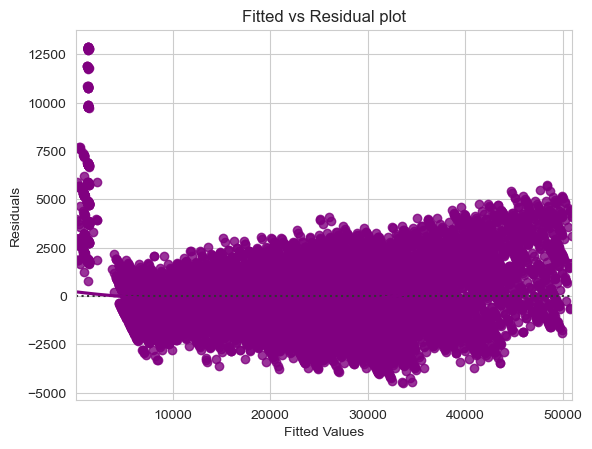

In [133]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Test for Normality 

In [134]:
stats.shapiro(df_pred["Residuals"])

C:\Users\Vijay\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9233999848365784, pvalue=0.0)

##### * Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity

In [135]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], Train.drop('product_wg_ton',axis=1))[1]

0.9107273517832271

##### Since p-value > 0.05 we can say that the residuals are homoscedastic.

#### The model equation will be as follows:

In [136]:
# Let us write the equation of linear regression
Equation = "product_wg_ton ="
print(Equation, end=" ")
X_train_lm=Train.drop(['product_wg_ton','flood_proof','flood_impacted'],axis=1)
for i in range(len(X_train_lm.columns)-1):
    if i == 0:
        print(lm2.params[i], "+", end=" ")
    elif i != len(X_train_lm.columns) - 1:
        print(
            lm2.params[i],
            "* (",
            X_train_lm.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(lm2.params[i], "* (", X_train_lm.columns[i], ")")

product_wg_ton = 731.4530567340701 + 372.91132155278 * ( WH_regional_zone ) +  358.54173518065204 * ( num_refill_req_l3m ) +  216.70020688576338 * ( transport_issue_l1y ) +  177.45637433094964 * ( Competitor_in_mkt ) +  232.1168616249263 * ( retail_shop_num ) +  105.17961389245852 * ( distributor_num ) +  313.1038607099032 * ( electric_supply ) +  418.349196024167 * ( dist_from_hub ) +  0.14280392638141404 * ( workers_num ) +  -243.00052643798657 * ( storage_issue_reported_l3m ) +  -106.12948424431447 * ( temp_reg_mach ) +  902.4742262458421 * ( approved_wh_govt_certificate ) +  1254.6353924942505 * ( wh_breakdown_l3m ) +  0.18015971227868732 * ( govt_check_l3m ) +  0.2689028645160184 * ( Location_type_Rural ) +  11.991992005618954 * ( Location_type_Urban ) +  1.1504912449818487 * ( zone_East ) +  -0.015047274533053767 * ( zone_North ) +  -8.550973938595533 * ( zone_South ) +  -429.1371996528071 * ( zone_West ) +  -2.648194892329336 * ( wh_owner_type_Company_Owned ) +  

In [137]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues


y_pred_1_Test = lm1.predict(Test)
y_pred_2_Test = lm2.predict(Test)

In [138]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_true=Train['product_wg_ton'],y_pred=y_pred_1_Train))
print('MAPE on Training Set for Model 2:',mean_absolute_percentage_error(y_true=Train['product_wg_ton'],y_pred=y_pred_2_Train))

MAPE on Training Set for Model 1: 0.09002266969192782
MAPE on Training Set for Model 2: 0.09002266969192782


In [139]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train['product_wg_ton'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=Train['product_wg_ton'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 1767.5004487244416
RMSE on Training Set for Model 2: 1767.5004487244416


In [140]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_true=Test['product_wg_ton'],y_pred=y_pred_1_Test))
print('MAPE on Test Set for Model 2:',mean_absolute_percentage_error(y_true=Test['product_wg_ton'],y_pred=y_pred_2_Test))

MAPE on Test Set for Model 1: 0.08855702304675425
MAPE on Test Set for Model 2: 0.08855702304675415


In [141]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test['product_wg_ton'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=Test['product_wg_ton'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 1709.3307381672334
RMSE on Test Set for Model 2: 1709.3307381672325


In [142]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_true=Train['product_wg_ton'],y_pred=y_pred_1_Train))
print('R2 on Training Set for Model 2:',r2_score(y_true=Train['product_wg_ton'],y_pred=y_pred_2_Train))

R2 on Training Set for Model 1: 0.9769616263283386
R2 on Training Set for Model 2: 0.9769616263283386


In [143]:
print('R2 on Test Set for Model 1:',r2_score(Test['product_wg_ton'],y_pred_1_Test))
print('R2 on Test Set for Model 2:',r2_score(Test['product_wg_ton'],y_pred_2_Test))

R2 on Test Set for Model 1: 0.9779825775660995
R2 on Test Set for Model 2: 0.9779825775660995


# separate independent and dependent variables

In [144]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = supply_encoding.drop('product_wg_ton', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = supply_encoding[['product_wg_ton']]


In [145]:
#from sklearn import preprocessing

# scale all the columns of the supply. This will produce a numpy array
#X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

#y_scaled = scaler.fit_transform(y)
#y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [146]:




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# fit a simple linear model

In [147]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for WH_capacity_size is 14.211122246728745
The coefficient for WH_regional_zone is -7.7110806320483585
The coefficient for num_refill_req_l3m is -2.6481948923275285
The coefficient for transport_issue_l1y is -429.1371996528086
The coefficient for Competitor_in_mkt is -8.550973938596215
The coefficient for retail_shop_num is -0.015047274532834744
The coefficient for distributor_num is 1.1504912449817304
The coefficient for flood_impacted is 2.2737367544323206e-13
The coefficient for flood_proof is -2.2737367544323206e-13
The coefficient for electric_supply is 11.991992005619762
The coefficient for dist_from_hub is 0.26890286451626993
The coefficient for workers_num is 0.1801597122782946
The coefficient for storage_issue_reported_l3m is 1254.6353924942484
The coefficient for temp_reg_mach is 902.4742262458417
The coefficient for approved_wh_govt_certificate is -106.12948424431374
The coefficient for wh_breakdown_l3m is -243.00052643798693
The coefficient for govt_check_l3

In [148]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1645.7693776511078


In [149]:
## Prediction on Training and Test set


y_pred_test = regression_model.predict(X_test)
y_pred_train = regression_model.predict(X_train)



In [150]:
## RMSE Calculation on Training and Test set
print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.09002266969193819


In [151]:
## RMSE Calculation on Training and Test set
print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1767.5004487244419


In [152]:

print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.08855702304676245


In [153]:

print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1709.3307381672403


In [154]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.9769616263283386


In [155]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.9779825775660993


# Create a regularized RIDGE model and note the coefficients

In [156]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 1.42095403e+01 -7.71123112e+00 -2.64457499e+00 -4.29128170e+02
  -8.55292911e+00 -1.50469674e-02  1.15050150e+00  0.00000000e+00
   0.00000000e+00  1.19911556e+01  2.68903335e-01  1.80176028e-01
   1.25463527e+03  9.02393947e+02 -1.06131885e+02 -2.42998066e+02
   1.42733515e-01  5.26156019e+01 -5.26156018e+01 -7.76219563e+01
   4.92312826e+01 -5.42637840e+00  3.38170521e+01 -7.18438570e+00
   7.18438570e+00]]


In [157]:
## Prediction on Training and Test set

y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)



In [158]:
## RMSE Calculation on Training and Test set
print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.09002239200252664


In [159]:
## RMSE Calculation on Training and Test set
print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1767.5004491319878


In [160]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.08855668823135432


In [161]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1709.3304822870691


In [162]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.9769616263177143


In [163]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.977982584157944


# Create a regularized LASSO model and note the coefficients

In [164]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 1.38879226e+01 -7.70625643e+00 -2.61182191e+00 -4.29031783e+02
 -8.53755168e+00 -1.50000321e-02  1.15077423e+00  0.00000000e+00
  0.00000000e+00  1.14258013e+01  2.68911956e-01  1.84289713e-01
  1.25463185e+03  9.01931033e+02 -1.06090944e+02 -2.42954927e+02
  1.27735942e-01  1.03889537e+02 -0.00000000e+00 -9.29982135e+01
  2.78043233e+01 -2.60798662e+01  1.23107515e+01 -1.38396339e+01
  0.00000000e+00]


In [165]:
## Prediction on Training and Test set

y_pred_test = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)



In [166]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.09002061281200245


In [167]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1767.5007475976943


In [168]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.08855173865296398


In [169]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1709.3068455363532


In [170]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.9769616185370487


In [171]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.9779831930707047


## Let us compare their scores

In [172]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.9769616263283386
0.9779825775660993


In [173]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9769616263177143
0.977982584157944


In [174]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9769616185370487
0.9779831930707047


In [175]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [176]:
from sklearn.preprocessing import PolynomialFeatures

In [177]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [178]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(17500, 326)

# Fit a simple non regularized linear model on poly features-

In [179]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[-2.21929938e-10 -2.40560567e+10 -1.30588464e+09 -6.56010214e+08
 -1.29911162e+09 -4.02442070e+08 -7.82256879e+08 -2.97922194e+08
  2.75406472e+08  6.79092868e+08  6.50598137e+08 -1.87589276e+08
  4.26976306e+07 -1.12393638e+08  3.60379510e+07  4.70735015e+07
  6.47983995e+07  1.62498371e+07  3.34786692e+07  6.61683075e+07
 -2.58585751e+07 -1.80923493e+07 -1.62253327e+07 -5.45345363e+07
  4.30144840e+06  1.53446816e+07  1.67380911e+00 -9.71039596e+00
 -8.26940963e+00 -1.03735878e+01 -4.24495041e-02  5.84459759e-01
 -5.34554015e+05  6.10094019e+03 -8.52217145e+01 -3.71456590e-01
  2.71521421e+00  2.09097378e+00  6.15410482e+01  2.10822925e+01
 -8.58325865e+00  4.98096823e+00  9.62241011e+09  9.62241006e+09
  4.81116636e+09  4.81116636e+09  4.81116642e+09  4.81116640e+09
  9.62248040e+09  9.62248041e+09 -2.97416508e+00 -1.07654358e+01
 -2.60947182e+00 -7.96842575e-03  5.59634458e-01 -6.47560089e+04
  8.59028112e+04 -3.12076935e+01 -1.73249024e-01  6.64555721e-01
 -5.74270972e-01  4.09830

In [180]:
## Prediction on Training and Test set

y_pred_test = regression_model.predict(X_test)
y_pred_train = regression_model.predict(X_train)



In [181]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.07403346409027238


In [182]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1541.1772053489167


In [183]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.0735697308218441


In [184]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1523.0161908376017


In [185]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.9824838802106477


In [186]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.982520729205209


In [187]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  7.88703827e+01  1.90996746e+01  3.61316016e+01
  -9.23118009e+01  2.79273207e+01  2.00482716e-02 -1.27838252e+00
   0.00000000e+00  0.00000000e+00 -4.14027960e+01  4.55924959e-01
  -5.94610112e-01  5.41926030e+02 -3.85166698e+02  1.81653117e+02
  -1.82580634e+02  4.13230712e+00  2.00464771e+02 -2.00464771e+02
  -1.18055933e+02 -4.44142346e+01  2.10600066e+02 -4.81298982e+01
   2.43946250e+00 -2.43946250e+00  2.31773630e+00 -6.95247805e+00
  -6.55732585e+00 -1.46166607e+01 -4.43280349e-02  6.90048321e-01
   0.00000000e+00  0.00000000e+00 -9.94709070e+01 -3.78154423e-01
   3.48774526e+00  1.16171478e+00  6.60993250e+01  2.04911988e+01
  -3.90918468e+00  3.51795291e+00  5.96054058e+01  1.92649771e+01
  -3.54585672e+00 -5.04620338e+00  6.36224375e+01  2.38400055e+01
   2.77509609e+01  5.11194220e+01 -2.26005950e+00 -9.64164662e+00
   7.13186365e-01 -9.59762434e-03  5.37903401e-01  0.00000000e+00
   0.00000000e+00 -3.18838810e+01 -1.89239798e-01  5.44033425e-

C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.17603e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [188]:
## Prediction on Training and Test set

y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)



In [189]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.07407653171230412


In [190]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1540.6932206381907


In [191]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.0736240623428573


In [192]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1522.3774125313091


In [193]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.98249487985821


In [194]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.9825353883238551


In [195]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.98249487985821
0.9825353883238551


In [196]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00 -7.52132248e+01 -7.49888563e+00 -1.25626759e+00
 -2.12465118e+03  1.19939281e+02 -2.10744603e-02 -8.11175214e-01
  0.00000000e+00  0.00000000e+00 -9.15888960e+01 -4.34648115e-01
 -1.50720665e+00  1.25667295e+03  1.02335414e+03 -7.21519913e+01
 -2.43827208e+02 -3.05705718e-01  1.53722094e+02 -0.00000000e+00
 -1.19332226e+01  3.35956944e+01  9.79028456e+01 -5.07961909e+01
  1.97376190e+01 -1.50835831e-14  2.29857094e+00 -6.94165071e+00
 -6.56628605e+00 -1.44947272e+01 -4.44775425e-02  6.84597612e-01
  0.00000000e+00  0.00000000e+00 -9.95940669e+01 -3.79708973e-01
  3.47136241e+00  1.16379998e+00  6.61708429e+01  2.04371727e+01
 -3.94113194e+00  3.51527627e+00  2.40502086e+02  1.99423744e+02
  0.00000000e+00 -3.52212436e-01  6.82123949e+01  2.80858728e+01
 -1.63768038e+00  2.14178762e+01 -2.25884167e+00 -9.65359847e+00
  7.59548973e-01 -9.65767601e-03  5.35975196e-01  0.00000000e+00
  0.00000000e+00 -3.19559150e+01 -1.89763844e-01  5.37589812e-01
 -7.52949894

C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+10, tolerance: 2.373e+08
  model = cd_fast.enet_coordinate_descent(


In [197]:
## Prediction on Training and Test set

y_pred_test = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)



In [198]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.07407532342321435


In [199]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 1540.6938317970455


In [200]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.0736241151009789


In [201]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1522.3935951984472


In [202]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 0.9824948659704209


In [203]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.9825350170289354


In [204]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.9824948659704209
0.9825350170289354


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [206]:
 
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [207]:
importance = regressor.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, ' Importance': importance}).sort_values(' Importance', ascending=False) 


In [208]:
## Prediction on Training and Test set

y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)



In [209]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


MAPE on Training Set for Model 1: 0.0


In [210]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


RMSE on Training Set for Model 1: 0.0


In [211]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


MAPE on Test Set for Model 1: 0.054889827761876314


In [212]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


RMSE on Test Set for Model 1: 1292.3860867403362


In [213]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


R2 on Training Set for Model 1: 1.0


In [214]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


R2 on Test Set for Model 1: 0.9874136785852328


In [215]:
print(regressor.score(X_train, y_train))


1.0


In [216]:
gnb = GaussianNB()

In [217]:

gnb.fit(X_train, y_train)

# Evaluate the model

y_pred = gnb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)

print("R2 Score:", r2)

C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 9712000.9988
Mean Absolute Error: 2222.918
R2 Score: 0.9268148464172768


In [218]:
importance = gnb.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, ' Importance': importance}).sort_values(' Importance', ascending=False) 


AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [ ]:
## Prediction on Training and Test set

y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)



In [ ]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


In [ ]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


In [ ]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


In [ ]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


In [ ]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


In [ ]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


In [ ]:
 
  
# create a regressor object 
regressor = RandomForestRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 


In [ ]:
importance = regressor.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, ' Importance': importance}).sort_values(' Importance', ascending=False) 


In [ ]:
feature_imp_df

In [ ]:

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)

print("R2 Score:", r2)


In [ ]:
## Prediction on Training and Test set

y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)



In [ ]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


In [ ]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


In [ ]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


In [ ]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


In [ ]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


In [ ]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2 = r2_score(y_test, reg.predict(X_test))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(r2))


In [ ]:
importance = reg.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, ' Importance': importance}).sort_values(' Importance', ascending=False) 


In [ ]:
## Prediction on Training and Test set

y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)



In [ ]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


In [ ]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


In [ ]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


In [ ]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


In [ ]:
## R2 Calculation on Training and Test set



print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


In [ ]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


In [ ]:
model = DecisionTreeRegressor(random_state = 0)

regr = BaggingRegressor(estimator=model,
                        n_estimators=10, random_state=0)

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
importance = regr.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, ' Importance': importance}).sort_values(' Importance', ascending=False) 


In [ ]:
## Prediction on Training and Test set

y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)



In [ ]:
## RMSE Calculation on Training and Test set

print('MAPE on Training Set for Model 1:',mean_absolute_percentage_error(y_train,y_pred_train))


In [ ]:
## RMSE Calculation on Training and Test set

print('RMSE on Training Set for Model 1:',mean_squared_error(y_train,y_pred_train,squared=False))


In [ ]:
print('MAPE on Test Set for Model 1:',mean_absolute_percentage_error(y_test,y_pred_test))


In [ ]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_test,y_pred_test,squared=False))


In [ ]:
## R2 Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('R2 on Training Set for Model 1:',r2_score(y_train,y_pred_train))


In [ ]:
print('R2 on Test Set for Model 1:',r2_score(y_test,y_pred_test))


In [ ]:
mse = mean_squared_error(y_test, regr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2 = r2_score(y_test, regr.predict(X_test))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(r2))


In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
r2 = cross_val_score(model, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)

#view mean absolute error

print("The mean squared error (MSE) on test set: {:.4f}".format(mean(absolute(scores))))

#view RMSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(sqrt(mean(absolute(scores)))))
print('R2 on Test Set for Model 1:',np.mean(r2))

In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = DecisionTreeRegressor(random_state = 0)

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
r2 = cross_val_score(model, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)


#view mean absolute error

print("The mean squared error (MSE) on test set: {:.4f}".format(mean(absolute(scores))))

#view RMSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(sqrt(mean(absolute(scores)))))
print('R2 on Test Set for Model 1:',np.mean(r2))